In [1]:
import community
import numpy as np
from math import *
import networkx as nx
import matplotlib.pyplot as plt
from igraph import *
import pandas as pd
import seaborn as sns
from scipy.stats import linregress
from scipy.stats import norm
from scipy.stats import chi2_contingency
from scipy.stats import describe
from matplotlib.patches import Rectangle
from sklearn.linear_model import LogisticRegression
import random

In [2]:
path = "/home/pierre/Documents/CourseOxford/MiniProjectData/social_0/social/adjacency_matrices/"
lData = []
def importMat(i):
    mat = pd.read_csv(path + "adjmat" + str(i) + ".csv", header=None)
    return mat

for i in range(43):
    lData.append(importMat(i+1).values)

dfHouse = pd.read_csv("/home/pierre/Documents/CourseOxford/MiniProjectData/social_0/social/householdcharacteristics.csv")
for i in range(dfHouse.shape[0]):
    if dfHouse.iloc[i]["ownrent"] == "LEASED":
        print(dfHouse.iloc[i])
        dfHouse.iat[i,13] = "RENTED"
        print(dfHouse.iloc[i])

matHouse = dfHouse.values
lHouseVill = []
lHouseVillDf = []
c = 0
for i in range(43):
    a = lData[i].shape[0]
    lHouseVill.append(matHouse[c:c + a])
    c += a

village                        3
HHnum_in_village             143
hohreligion             HINDUISM
castesubcaste                NaN
rooftype1                      0
rooftype2                      1
rooftype3                      0
rooftype4                      0
rooftype5                      0
room_no                        4
bed_no                         3
electricity         Yes, Private
latrine                     None
ownrent                   LEASED
leader                         0
adopt                          0
Name: 518, dtype: object
village                        3
HHnum_in_village             143
hohreligion             HINDUISM
castesubcaste                NaN
rooftype1                      0
rooftype2                      1
rooftype3                      0
rooftype4                      0
rooftype5                      0
room_no                        4
bed_no                         3
electricity         Yes, Private
latrine                     None
ownrent           

village                       32
HHnum_in_village              18
hohreligion             HINDUISM
castesubcaste                OBC
rooftype1                      0
rooftype2                      0
rooftype3                      0
rooftype4                      0
rooftype5                      1
room_no                        5
bed_no                         1
electricity         Yes, Private
latrine                    Owned
ownrent                   LEASED
leader                         0
adopt                          0
Name: 6768, dtype: object
village                       32
HHnum_in_village              18
hohreligion             HINDUISM
castesubcaste                OBC
rooftype1                      0
rooftype2                      0
rooftype3                      0
rooftype4                      0
rooftype5                      1
room_no                        5
bed_no                         1
electricity         Yes, Private
latrine                    Owned
ownrent          

In [3]:

dfHouse[dfHouse.castesubcaste.notnull()]

,village,HHnum_in_village,hohreligion,castesubcaste,rooftype1,rooftype2,rooftype3,rooftype4,rooftype5,room_no,bed_no,electricity,latrine,ownrent,leader,adopt
2806,15,1,HINDUISM,OBC,0,0,0,1,0,1,1,"Yes, Private",None,OWNED,0,0
2808,15,3,HINDUISM,OBC,0,0,1,0,0,3,1,"Yes, Private",None,OWNED BUT SHARED,0,0
2809,15,4,HINDUISM,OBC,0,0,1,0,0,2,0,"Yes, Private",Owned,OWNED,0,1
2811,15,6,HINDUISM,OBC,0,1,1,0,0,1,0,"Yes, Private",None,OWNED,0,0
2812,15,7,HINDUISM,OBC,0,0,0,0,0,3,0,"Yes, Private",None,RENTED,0,0
2813,15,8,HINDUISM,OBC,0,0,1,0,0,3,0,"Yes, Private",Owned,RENTED,0,0
2814,15,9,HINDUISM,OBC,0,0,0,1,0,3,1,"Yes, Government",None,OWNED,0,0
2815,15,10,HINDUISM,OBC,0,1,0,0,0,1,0,"Yes, Government",None,OWNED,0,1
2817,15,12,HINDUISM,OBC,0,0,1,0,0,2,1,"Yes, Private",None,OWNED BUT SHARED,0,0
2818,15,13,HINDUISM,OBC,0,0,0,0,0,2,1,"Yes, Private",None,OWNED,0,0


In [4]:
dfLogit = dfHouse.drop(['village', 'HHnum_in_village','room_no', 'bed_no'], axis=1)
dummy = pd.get_dummies(dfLogit)
dummy.head()


,rooftype1,rooftype2,rooftype3,rooftype4,rooftype5,leader,adopt,hohreligion_CHRISTIANITY,hohreligion_HINDUISM,hohreligion_ISLAM,...,"electricity_Yes, Government","electricity_Yes, Private",latrine_Common,latrine_None,latrine_Owned,ownrent_6,ownrent_GIVEN BY GOVERNMENT,ownrent_OWNED,ownrent_OWNED BUT SHARED,ownrent_RENTED
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,0,1,0,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
2,0,0,0,0,1,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0


In [5]:
list(dummy)

['rooftype1',
 'rooftype2',
 'rooftype3',
 'rooftype4',
 'rooftype5',
 'leader',
 'adopt',
 'hohreligion_CHRISTIANITY',
 'hohreligion_HINDUISM',
 'hohreligion_ISLAM',
 'castesubcaste_GENERAL',
 'castesubcaste_MINORITY',
 'castesubcaste_OBC',
 'castesubcaste_SCHEDULE CASTE',
 'castesubcaste_SCHEDULE TRIBE',
 'electricity_No',
 'electricity_Yes, Government',
 'electricity_Yes, Private',
 'latrine_Common',
 'latrine_None',
 'latrine_Owned',
 'ownrent_6',
 'ownrent_GIVEN BY GOVERNMENT',
 'ownrent_OWNED',
 'ownrent_OWNED BUT SHARED',
 'ownrent_RENTED']

In [6]:
dummy.loc[: ,"castesubcaste_MINORITY" ]

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
9568    0
9569    0
9570    0
9571    0
9572    0
9573    0
9574    0
9575    0
9576    0
9577    0
9578    0
9579    0
9580    0
9581    0
9582    0
9583    0
9584    0
9585    0
9586    0
9587    0
9588    0
9589    0
9590    0
9591    0
9592    0
9593    0
9594    0
9595    0
9596    0
9597    0
Name: castesubcaste_MINORITY, Length: 9598, dtype: uint8

In [7]:
dataCleanedLeaders = dummy.loc[dummy['leader'] == 1]
dataCleanedLeaders = dataCleanedLeaders.drop(['leader'], axis = 1)
dataCleaned = dummy.drop(['leader'], axis = 1)

In [8]:
target = dataCleanedLeaders[['adopt']]
dataCleanedLeaders = dataCleanedLeaders.drop(['adopt'], axis = 1)
dataCleaned = dataCleaned.drop(['adopt'], axis = 1)
lHouseVillDf = []
c = 0
for i in range(43):
    a = lData[i].shape[0]
    lHouseVillDf.append(dataCleaned.loc[[i for i in range(c,c+a)]])
    c += a

In [9]:
dataCleanedLeaders

,rooftype1,rooftype2,rooftype3,rooftype4,rooftype5,hohreligion_CHRISTIANITY,hohreligion_HINDUISM,hohreligion_ISLAM,castesubcaste_GENERAL,castesubcaste_MINORITY,...,"electricity_Yes, Government","electricity_Yes, Private",latrine_Common,latrine_None,latrine_Owned,ownrent_6,ownrent_GIVEN BY GOVERNMENT,ownrent_OWNED,ownrent_OWNED BUT SHARED,ownrent_RENTED
1,0,1,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,0,0,0,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
14,0,0,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
17,0,0,0,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
23,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
27,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,1,0,1,0,0,0
35,0,0,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0
40,0,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
41,0,0,0,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
43,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [10]:
list(dataCleanedLeaders)

['rooftype1',
 'rooftype2',
 'rooftype3',
 'rooftype4',
 'rooftype5',
 'hohreligion_CHRISTIANITY',
 'hohreligion_HINDUISM',
 'hohreligion_ISLAM',
 'castesubcaste_GENERAL',
 'castesubcaste_MINORITY',
 'castesubcaste_OBC',
 'castesubcaste_SCHEDULE CASTE',
 'castesubcaste_SCHEDULE TRIBE',
 'electricity_No',
 'electricity_Yes, Government',
 'electricity_Yes, Private',
 'latrine_Common',
 'latrine_None',
 'latrine_Owned',
 'ownrent_6',
 'ownrent_GIVEN BY GOVERNMENT',
 'ownrent_OWNED',
 'ownrent_OWNED BUT SHARED',
 'ownrent_RENTED']

In [11]:
logreg = LogisticRegression()
print(list(dataCleanedLeaders))
print(logreg.fit(dataCleanedLeaders, target).coef_)
print(logreg.intercept_)

['rooftype1', 'rooftype2', 'rooftype3', 'rooftype4', 'rooftype5', 'hohreligion_CHRISTIANITY', 'hohreligion_HINDUISM', 'hohreligion_ISLAM', 'castesubcaste_GENERAL', 'castesubcaste_MINORITY', 'castesubcaste_OBC', 'castesubcaste_SCHEDULE CASTE', 'castesubcaste_SCHEDULE TRIBE', 'electricity_No', 'electricity_Yes, Government', 'electricity_Yes, Private', 'latrine_Common', 'latrine_None', 'latrine_Owned', 'ownrent_6', 'ownrent_GIVEN BY GOVERNMENT', 'ownrent_OWNED', 'ownrent_OWNED BUT SHARED', 'ownrent_RENTED']
[[ 0.56247477  0.3392276   0.07973481  0.23218085 -0.24002241 -0.27666075
  -0.61233395  0.3874918  -0.24398812  0.70227073 -0.06152169  0.03080385
  -0.45498843 -0.31585612  0.09408512 -0.2797319  -0.51385437  0.23574203
  -0.22339058  0.         -0.13564689 -0.09754441 -0.09913272 -0.16917889]]
[-0.50150291]


/home/pierre/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pierre/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Stats Adoption

In [12]:
dataCleaned
listProba = []
for i in range(9598):
    listProba.append(logreg.predict_proba(dataCleaned.iloc[[i]])[0][1])
print(describe(listProba))
print(np.percentile(np.array(listProba), 1))

DescribeResult(nobs=9598, minmax=(0.08232995443668237, 0.7687741483064657), mean=0.2614378415545399, variance=0.00962344400393396, skewness=1.4564073677549596, kurtosis=4.4248468789937325)
0.0998839873780279


In [13]:
print(np.percentile(np.array(listProba), 97.5))

0.5342857343225517


In [14]:
sqrt(0.009640146524487333)

0.09818424784295764

5 to 8 trimester

In [15]:
def listleaders(lHouse):
    lIndex = []
    for i in range(lHouse.shape[0]):
        if lHouse[i,-2] == 1:
            lIndex.append(i)
    return lIndex
        
def selectOnes(arr):
    lIndex = []
    for i in range(len(arr)):
        if arr[i] == 1:
            lIndex.append(i)
    return lIndex

## A = Adjacency matrix, listLeaders = OK, lHouse = DataFrame Cleaned for the respective village, logReg = logistic regression fitted
def diffusionProcess(A, listLeaders, lHouse, logreg):
    lAdoptOverTime = []
    lInformedOverTime = []
    qN = 0.095 # Probability transmit if non Adopter
    qP = 0.45 # Probability transmit if Adopter
    dictNeighbours = {}
    for i in range(A.shape[0]):
        listNeighbours = selectOnes(A[i])
        dictNeighbours[i] = listNeighbours
    T = 8
    lAdopt = []
    lInformed = [leader for leader in listLeaders]
    lNewInformed = []
    #Leaders Make Decision
    for leader in listLeaders:
        y = logreg.predict_proba(lHouse.iloc[[leader]])[0][1]
        if random.random() < y:
            lAdopt.append(leader)
    
    ## Leaders inform or not neighbourhouds
    for leader in listLeaders:
        for nei in dictNeighbours[leader]:
            if leader in lAdopt:
                if random.random() < qP:
                    if nei not in lNewInformed and nei not in lInformed:
                        lNewInformed.append(nei)
            else :
                if random.random() < qN:
                    if nei not in lNewInformed and nei not in lInformed:
                        lNewInformed.append(nei)
    lAdoptOverTime.append(lAdopt)
    lInformedOverTime.append(lInformed)
    ## Across time:
    for i in range(T):
        #print("T = ", i)
        ## Newly informed take decision
        #print("New informed")
        #print(lNewInformed)
        #print(lAdopt)
        for new in lNewInformed:
            y = logreg.predict_proba(lHouse.iloc[[new]])[0][1]
            #print("Proba Accept")
            #print(y)
            if random.random() < y:
                #print("Hourra")
                lAdopt = lAdopt + [new]
        lInformed = lInformed + lNewInformed
        lNewInformed = []
        
        ## Informed people spread or not the information
        for infor in lInformed:
            for nei in dictNeighbours[infor]:
                if infor in lAdopt:
                    if random.random() < qP:
                        if nei not in lNewInformed and nei not in lInformed:
                            lNewInformed.append(nei)
                else:
                    if random.random() < qN:
                        if nei not in lNewInformed and nei not in lInformed:
                            lNewInformed.append(nei)
        lAdoptOverTime.append(lAdopt)
        lInformedOverTime.append(lInformed)
    return [lAdoptOverTime, lInformedOverTime]

### Test Diffusion

In [16]:
lCandidates = [29, 40, 3, 27]

In [17]:
A = np.array([[0,1,1,0,0], [1,0,0,1,0], [1,0,0,0,1], [0,1,0,0,1], [0,0,1,1,0]])
listLeaders = listleaders(lHouseVill[29])
lHouse = lHouseVillDf[29].iloc[0:5]
result = diffusionProcess(A, [0], lHouse, logreg)
result

[[[0], [0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1]],
 [[0],
  [0],
  [0, 1, 2],
  [0, 1, 2, 3],
  [0, 1, 2, 3],
  [0, 1, 2, 3],
  [0, 1, 2, 3],
  [0, 1, 2, 3],
  [0, 1, 2, 3]]]

In [18]:
result

[[[0], [0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1]],
 [[0],
  [0],
  [0, 1, 2],
  [0, 1, 2, 3],
  [0, 1, 2, 3],
  [0, 1, 2, 3],
  [0, 1, 2, 3],
  [0, 1, 2, 3],
  [0, 1, 2, 3]]]

## Diffusion on leaders with repartition over the clusters proportional to the cluster and 

### Creation of the clusters

In [19]:
def partitionAnal(dictPart, lHouse):
    lFraction = []
    lValues = list(dictPart.values())
    dUse = {}
    for val in lValues:
        dUse[val] = []
    for node, val in dictPart.items():
        dUse[val].append(node)
    for part, lNodes in dUse.items():
        denom = 0
        n = len(lNodes)
        if n > 1:
            for node in lNodes:
                if lHouse[node, -1] == 1:
                    denom += 1
            lFraction.append((n,denom/n))
    return [lFraction, dUse]

In [20]:
lResult = []
lMean = []
ldUse = []
for i in range(43):
    mat = lData[i]
    G = nx.from_numpy_matrix(mat)
    dictCom = community.best_partition(G)
    [lFraction, dUse] = partitionAnal(dictCom, lHouseVill[i])
    ldUse.append(dUse)
    lResult.append(lFraction)
print(lResult)

[[(42, 0.30952380952380953), (26, 0.2692307692307692), (36, 0.16666666666666666), (27, 0.2222222222222222), (33, 0.15151515151515152), (5, 0.2), (6, 0.6666666666666666)], [(60, 0.2), (24, 0.20833333333333334), (26, 0.0), (68, 0.1323529411764706)], [(33, 0.18181818181818182), (34, 0.3235294117647059), (34, 0.058823529411764705), (68, 0.07352941176470588), (41, 0.2926829268292683), (13, 0.0), (34, 0.0), (15, 0.13333333333333333)], [(25, 0.0), (41, 0.024390243902439025), (34, 0.0), (51, 0.27450980392156865), (25, 0.04), (24, 0.0), (22, 0.045454545454545456)], [(22, 0.4090909090909091), (12, 0.25), (21, 0.09523809523809523), (15, 0.3333333333333333), (21, 0.14285714285714285), (16, 0.1875)], [(24, 0.20833333333333334), (10, 0.0), (55, 0.32727272727272727), (39, 0.15384615384615385), (52, 0.1346153846153846), (21, 0.047619047619047616)], [(30, 0.36666666666666664), (30, 0.2), (26, 0.07692307692307693), (23, 0.13043478260869565), (27, 0.5555555555555556), (18, 0.6111111111111112), (12, 0.083

### Selection best leaders in each cluster

In [17]:
## For a given Village:
# Compute number of leaders assigned
# Assign leaders proportional to size cluster
# For each cluster, compute subgraph, order people according to eigenvector centrality
# Assign leaders according to those rankings in each cluster
#Run dynamic with those assigned leaders and compare the number of people accepting ratio with the same diffusion on
#original leaders
lResult[29]

[(45, 0.4888888888888889),
 (31, 0.03225806451612903),
 (36, 0.0),
 (36, 0.0),
 (41, 0.04878048780487805),
 (23, 0.043478260869565216),
 (34, 0.029411764705882353)]

In [16]:
# A = Adjacency matrix, dUse = dictionnary with nodes per cluster
def assignLeaders(lProportion, nLeaders):
    n = nLeaders
    lIdeal = [a*n for a in lProportion]
    lRemaining = [nId - int(nId) for nId in lIdeal]
    lIdeal = [int(nId) for nId in lIdeal]
    remain = round(sum(lRemaining))
    lAttribution = list(np.random.multinomial(remain, lProportion, size=1)[0])
    lFinal = [a + b for (a,b) in zip(lAttribution, lIdeal)]
    return(lFinal)
    
def listLeaderSelected(A, dUse, lHouse):
    G = nx.from_numpy_matrix(A)
    nLeaders = len(listleaders(lHouse))
    sizeClusters = [len(dUse[index]) for index in dUse]
    nPop = sum(sizeClusters)
    lProportion = [el/nPop for el in sizeClusters]
    assignmentLeaders = assignLeaders(lProportion, nLeaders)
    v = nx.eigenvector_centrality_numpy(G)
    listLeadersRanking = []
    for indexCluster in dUse:
        listIndividualSorted = sorted(dUse[indexCluster], key = lambda k: v[k], reverse = True)
        listIndividualfinal = listIndividualSorted[0:assignmentLeaders[indexCluster]]
        listLeadersRanking.append(listIndividualfinal)
    l = []
    for el in listLeadersRanking:
        l = l + el
    return(sorted(l))

def listLeaderSelectedDegree(A, dUse, lHouse):
    G = nx.from_numpy_matrix(A)
    nLeaders = len(listleaders(lHouse))
    sizeClusters = [len(dUse[index]) for index in dUse]
    nPop = sum(sizeClusters)
    lProportion = [el/nPop for el in sizeClusters]
    assignmentLeaders = assignLeaders(lProportion, nLeaders)
    v = nx.degree_centrality(G)
    listLeadersRanking = []
    for indexCluster in dUse:
        listIndividualSorted = sorted(dUse[indexCluster], key = lambda k: v[k], reverse = True)
        listIndividualfinal = listIndividualSorted[0:assignmentLeaders[indexCluster]]
        listLeadersRanking.append(listIndividualfinal)
    l = []
    for el in listLeadersRanking:
        l = l + el
    return(sorted(l))

### Result Analysis

In [17]:
def analysisDiffusion(index, nSimu):
    A =lData[index]
    nNetwork = A.shape[0]
    dUse = ldUse[index]
    lHouse = lHouseVill[index]
    lHouseVillDif = lHouseVillDf[index]
    listOriginalLeaders = listleaders(lHouse)
    listStrategyLeaders = listLeaderSelected(A, dUse, lHouse)
    listRandomLeaders = random.sample(range(nNetwork), len(listOriginalLeaders))
    lOriAdoption = np.array([0,0,0,0,0,0,0,0,0])
    lOriInformed = np.array([0,0,0,0,0,0,0,0,0])
    lStraAdoption = np.array([0,0,0,0,0,0,0,0,0])
    lStraInformed = np.array([0,0,0,0,0,0,0,0,0])
    lRandAdoption = np.array([0,0,0,0,0,0,0,0,0])
    lRandInformed = np.array([0,0,0,0,0,0,0,0,0])
    for i in range(nSimu):
        res = diffusionProcess(A, listOriginalLeaders, lHouseVillDif, logreg)
        lOriAdoption = np.array([len(l)/nNetwork for l in res[0]]) + lOriAdoption
        lOriInformed = np.array([len(l)/nNetwork for l in res[1]]) + lOriInformed
        res = diffusionProcess(A, listStrategyLeaders, lHouseVillDif, logreg)
        lStraAdoption = np.array([len(l)/nNetwork for l in res[0]]) + lStraAdoption
        lStraInformed = np.array([len(l)/nNetwork for l in res[1]]) + lStraInformed
        res = diffusionProcess(A, listRandomLeaders, lHouseVillDif, logreg)
        lRandAdoption = np.array([len(l)/nNetwork for l in res[0]]) + lRandAdoption
        lRandInformed = np.array([len(l)/nNetwork for l in res[1]]) + lRandInformed
    return([lOriAdoption/nSimu, lOriInformed/nSimu, lStraAdoption/nSimu, lStraInformed/nSimu, lRandAdoption/nSimu, lRandInformed/nSimu])

def analysisDiffusionEigen(index, nSimu):
    A =lData[index]
    G = nx.from_numpy_matrix(A)
    nNetwork = A.shape[0]
    dUse = ldUse[index]
    lHouse = lHouseVill[index]
    lHouseVillDif = lHouseVillDf[index]
    v = nx.eigenvector_centrality_numpy(G)
    listBest = sorted(list(v), key = lambda x : v[x], reverse = True)
    nLeaders = len(listleaders(lHouse))
    listLeadersEigen = listBest[:nLeaders]
    lEigenAdoption = np.array([0,0,0,0,0,0,0,0,0])
    lEigenInformed = np.array([0,0,0,0,0,0,0,0,0])
    for i in range(nSimu):
        res = diffusionProcess(A, listLeadersEigen, lHouseVillDif, logreg)
        lEigenAdoption = np.array([len(l)/nNetwork for l in res[0]]) + lEigenAdoption
        lEigenInformed = np.array([len(l)/nNetwork for l in res[1]]) + lEigenInformed
    return([lEigenAdoption/nSimu, lEigenInformed/nSimu])


def analysisDiffusionConf(A, index, nSimu):
    nNetwork = A.shape[0]
    dUse = ldUse[index]
    lHouse = lHouseVill[index]
    lHouseVillDif = lHouseVillDf[index]
    listOriginalLeaders = listleaders(lHouse)
    listStrategyLeaders = listLeaderSelected(A, dUse, lHouse)
    listRandomLeaders = random.sample(range(nNetwork), len(listOriginalLeaders))
    lOriAdoption = np.array([0,0,0,0,0,0,0,0,0])
    lOriInformed = np.array([0,0,0,0,0,0,0,0,0])
    lStraAdoption = np.array([0,0,0,0,0,0,0,0,0])
    lStraInformed = np.array([0,0,0,0,0,0,0,0,0])
    lRandAdoption = np.array([0,0,0,0,0,0,0,0,0])
    lRandInformed = np.array([0,0,0,0,0,0,0,0,0])
    for i in range(nSimu):
        res = diffusionProcess(A, listOriginalLeaders, lHouseVillDif, logreg)
        lOriAdoption = np.array([len(l)/nNetwork for l in res[0]]) + lOriAdoption
        lOriInformed = np.array([len(l)/nNetwork for l in res[1]]) + lOriInformed
        res = diffusionProcess(A, listStrategyLeaders, lHouseVillDif, logreg)
        lStraAdoption = np.array([len(l)/nNetwork for l in res[0]]) + lStraAdoption
        lStraInformed = np.array([len(l)/nNetwork for l in res[1]]) + lStraInformed
        res = diffusionProcess(A, listRandomLeaders, lHouseVillDif, logreg)
        lRandAdoption = np.array([len(l)/nNetwork for l in res[0]]) + lRandAdoption
        lRandInformed = np.array([len(l)/nNetwork for l in res[1]]) + lRandInformed
    return([lOriAdoption/nSimu, lOriInformed/nSimu, lStraAdoption/nSimu, lStraInformed/nSimu, lRandAdoption/nSimu, lRandInformed/nSimu])


In [18]:
res = analysisDiffusion(29, 500)

In [19]:
resEigen1 = analysisDiffusionEigen(29, 500)

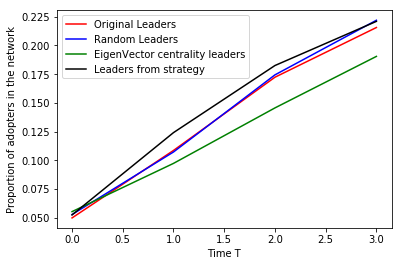

In [20]:
time = [i for i in range(4)]
plt.xlabel("Time T")
plt.ylabel("Proportion of adopters in the network")
plt.plot(time,res[0][:4], '-r', label= 'Original Leaders')
plt.plot(time,res[4][:4], '-b', label = 'Random Leaders')
plt.plot(time,resEigen1[0][:4], '-g', label = 'EigenVector centrality leaders' )
plt.plot(time,res[2][:4], '-k', label= 'Leaders from strategy' )
plt.legend()
#plt.savefig("Adopters29", dpi=900)

In [21]:
a = (np.array(res[2]))/(np.array(resEigen1[0]))
print(max(a))
np.argmax(a)

1.2753078522309285


1

In [ ]:
z = nx.degree_centrality(nx.from_numpy_matrix(lData[29]))
z = [z[i] for i in z]

In [ ]:
Gconf = nx.configuration_model(z)
Gconf=nx.Graph(Gconf)
Gconf.remove_edges_from(Gconf.selfloop_edges())
Aconf = nx.adjacency_matrix(Gconf)


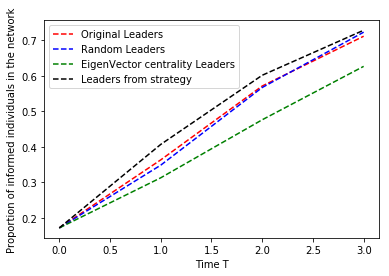

In [22]:
plt.xlabel("Time T")
plt.ylabel("Proportion of informed individuals in the network")
plt.plot(time,res[1][:4], '--r', label= 'Original Leaders')
plt.plot(time,res[5][:4], '--b', label = 'Random Leaders' )
plt.plot(time,resEigen1[1][:4], '--g', label = 'EigenVector centrality Leaders' )
plt.plot(time,res[3][:4], '--k', label= 'Leaders from strategy' )
plt.legend()
#plt.savefig("Informed29", dpi=900)

In [105]:
res2 = analysisDiffusion(40, 500)

In [130]:
resEigen2 = analysisDiffusionEigen(40, 500)

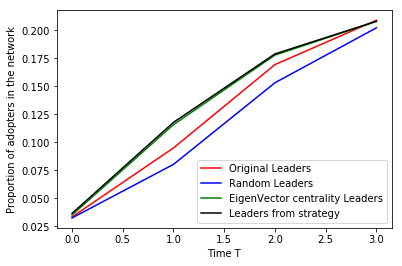

In [158]:
time = [i for i in range(4)]
plt.xlabel("Time T")
plt.ylabel("Proportion of adopters in the network")
plt.plot(time,res2[0][:4], '-r', label= 'Original Leaders')
plt.plot(time,res2[4][:4], '-b', label = 'Random Leaders' )
plt.plot(time,resEigen2[0][:4], '-g', label = 'EigenVector centrality Leaders' )
plt.plot(time,res2[2][:4], '-k', label= 'Leaders from strategy')
plt.legend()
plt.savefig("Adopters40", dpi=900)

In [169]:
a = (np.array(res2[2]))/(np.array(resEigen2[0]))
print(max(a))
np.argmax(a)

1.0415922429191116


0

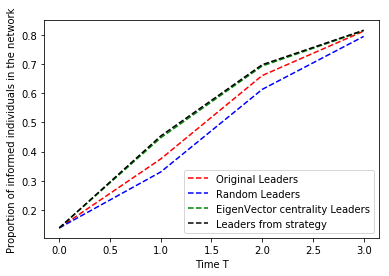

In [159]:
time = [i for i in range(4)]
plt.xlabel("Time T")
plt.ylabel("Proportion of informed individuals in the network")
plt.plot(time,res2[1][:4], '--r', label= 'Original Leaders')
plt.plot(time,res2[5][:4], '--b', label = 'Random Leaders')
plt.plot(time,resEigen2[1][:4], '--g', label= 'EigenVector centrality Leaders' )
plt.plot(time,res2[3][:4], '--k', label = 'Leaders from strategy' )
plt.legend()
plt.savefig("Informed40", dpi=900)

In [108]:
res3 = analysisDiffusion(3, 500)

In [133]:
resEigen3 = analysisDiffusionEigen(3, 500)

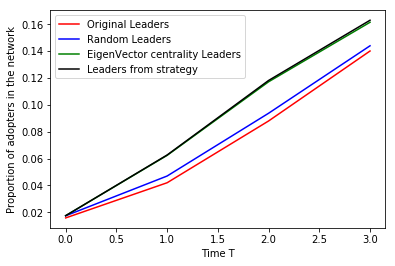

In [160]:
time = [i for i in range(4)]
plt.xlabel("Time T")
plt.ylabel("Proportion of adopters in the network")
plt.plot(time,res3[0][:4], '-r', label = 'Original Leaders')
plt.plot(time,res3[4][:4], '-b', label = 'Random Leaders')
plt.plot(time,resEigen3[0][:4], '-g', label = "EigenVector centrality Leaders")
plt.plot(time,res3[2][:4], '-k', label = 'Leaders from strategy' )
plt.legend()
plt.savefig("Adopters3", dpi=900)

In [170]:
a = (np.array(res3[2]))/(np.array(resEigen3[0]))
print(max(a))
np.argmax(a)

1.009326424870466


3

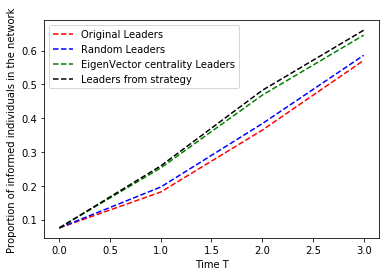

In [161]:

plt.xlabel("Time T")
plt.ylabel("Proportion of informed individuals in the network")
plt.plot(time,res3[1][:4], '--r', label = 'Original Leaders')
plt.plot(time,res3[5][:4], '--b', label = 'Random Leaders')
plt.plot(time,resEigen3[1][:4], '--g', label = "EigenVector centrality Leaders")
plt.plot(time,res3[3][:4], '--k', label = 'Leaders from strategy')
plt.legend()
plt.savefig("Informed3", dpi=900)

In [111]:
res4 = analysisDiffusion(27, 500)

In [137]:
resEigen4 = analysisDiffusionEigen(27, 500)

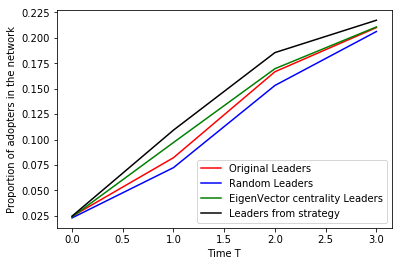

In [162]:
time = [i for i in range(4)]
plt.xlabel("Time T")
plt.ylabel("Proportion of adopters in the network")
plt.plot(time,res4[0][:4], '-r', label = 'Original Leaders')
plt.plot(time,res4[4][:4], '-b', label =  'Random Leaders')
plt.plot(time,resEigen4[0][:4], '-g', label = "EigenVector centrality Leaders" )
plt.plot(time,res4[2][:4], '-k', label = 'Leaders from strategy')
plt.legend()
plt.savefig("Adopters27", dpi=900)

In [171]:
a = (np.array(res4[2]))/(np.array(resEigen4[0]))
print(max(a))
np.argmax(a)

1.1253795027488294


1

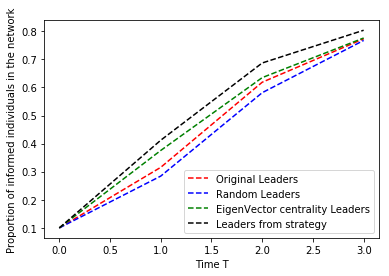

In [163]:
plt.xlabel("Time T")
plt.ylabel("Proportion of informed individuals in the network")
plt.plot(time,res4[1][:4], '--r', label = 'Original Leaders')
plt.plot(time,res4[5][:4], '--b', label =  'Random Leaders')
plt.plot(time,resEigen4[1][:4], '--g', label = "EigenVector centrality Leaders" )
plt.plot(time,res4[3][:4], '--k', label = 'Leaders from strategy' )
plt.legend()
plt.savefig("Informded27", dpi=900)

In [194]:
resEigen5 = analysisDiffusionEigen(0, 500)

In [195]:
res5 = analysisDiffusion(0, 500)

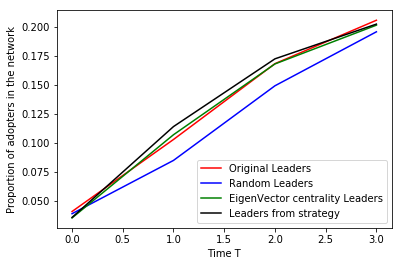

In [196]:
time = [i for i in range(4)]
plt.xlabel("Time T")
plt.ylabel("Proportion of adopters in the network")
plt.plot(time,res5[0][:4], '-r', label = 'Original Leaders')
plt.plot(time,res5[4][:4], '-b', label =  'Random Leaders')
plt.plot(time,resEigen5[0][:4], '-g', label = "EigenVector centrality Leaders" )
plt.plot(time,res5[2][:4], '-k', label = 'Leaders from strategy')
plt.legend()

In [197]:
a = (np.array(res5[2]))/(np.array(resEigen5[0]))
print(max(a))
np.argmax(a)

1.0658503961312884


1

In [20]:
for i in range(len(lCandidates)):
    res = analysisDiffusion(lCandidates[i], 100)
    print(describe(res[0]))
    print(describe(res[1]))

DescribeResult(nobs=100, minmax=(0.1867704280155642, 0.35019455252918286), mean=0.2596108949416342, variance=0.0010849245532586688, skewness=-0.04098132132926158, kurtosis=-0.2942737180740078)
DescribeResult(nobs=100, minmax=(0.19455252918287938, 0.3151750972762646), mean=0.25455252918287935, variance=0.0009503749206091407, skewness=0.006950554330106482, kurtosis=-0.5824510817164583)
DescribeResult(nobs=100, minmax=(0.17928286852589642, 0.30677290836653387), mean=0.2360956175298804, variance=0.0007297046271030809, skewness=0.41884723777503324, kurtosis=0.032091226067466394)
DescribeResult(nobs=100, minmax=(0.1752988047808765, 0.32270916334661354), mean=0.23920318725099599, variance=0.0008875664792237547, skewness=0.22228794878292496, kurtosis=-0.060262601583553455)
DescribeResult(nobs=100, minmax=(0.1297071129707113, 0.2719665271966527), mean=0.19514644351464436, variance=0.0007577464036559642, skewness=0.23017885574882546, kurtosis=0.1737902353916585)
DescribeResult(nobs=100, minmax=(

In [283]:
0.2604393939393939 - 0.25852020202020204

0.001919191919191876

In [284]:
0.0010853632685843687 + 0.001053127175742215

0.002138490444326584

In [285]:
-0.001919191919191876/(sqrt(0.002138490444326584))

-0.04150159131243775

In [288]:
for i in range(len(lCandidates)):
    res = analysisDiffusion(lCandidates[i], 1000)
    print(describe(res[0]))
    print(describe(res[1]))

DescribeResult(nobs=1000, minmax=(0.17898832684824903, 0.3735408560311284), mean=0.2672762645914397, variance=0.0008339108688849034, skewness=0.08001340829996269, kurtosis=-0.18322082481124147)
DescribeResult(nobs=1000, minmax=(0.19066147859922178, 0.38132295719844356), mean=0.27052140077821013, variance=0.0007789803763096319, skewness=0.060451108528149854, kurtosis=0.11180699298148467)
DescribeResult(nobs=1000, minmax=(0.12640449438202248, 0.2612359550561798), mean=0.18889606741573034, variance=0.0004675012643624561, skewness=0.09179212053109932, kurtosis=-0.14517186590392273)
DescribeResult(nobs=1000, minmax=(0.12078651685393259, 0.2443820224719101), mean=0.19083426966292133, variance=0.0004347788563086506, skewness=-0.04859003517137347, kurtosis=-0.3158680538406857)
DescribeResult(nobs=1000, minmax=(0.1593625498007968, 0.3386454183266932), mean=0.24050199203187242, variance=0.0007653570937328337, skewness=0.12818840448267654, kurtosis=-0.10102381651979009)
DescribeResult(nobs=1000, 

In [289]:
sqrt(0.0007054261607522665)

0.026559859953551458

In [290]:
sqrt(0.0010701498100488)

0.032713144300858636

### Comparison with configuration model

In [17]:
def analysisDiffusionDegree(index, nSimu):
    A =lData[index]
    G = nx.from_numpy_matrix(A)
    degreeSequence = []
    for el in A:
        degreeSequence.append(len(selectOnes(el)))
    G2 = nx.configuration_model(degreeSequence)
    G2=nx.Graph(G2)
    G2.remove_edges_from(G2.selfloop_edges())
    A2 = nx.to_numpy_matrix(G2)
    A2 = A2.astype(int)
    A2 = np.array(A2)
    nNetwork = A.shape[0]
    dUse = ldUse[index]
    lHouse = lHouseVill[index]
    lHouseVillDif = lHouseVillDf[index]
    listStrategyLeaders = listLeaderSelected(A, dUse, lHouse)
    lOri = []
    lConf = []
    for i in range(nSimu):
        lOri.append(len(diffusionProcess(A, listStrategyLeaders, lHouseVillDif, logreg)[0])/nNetwork)
        lConf.append(len(diffusionProcess(A2, listStrategyLeaders, lHouseVillDif, logreg)[0])/nNetwork)
    print(len(listStrategyLeaders)/nNetwork)
    return([lOri, lConf])

In [61]:
for i in range(len(lCandidates)):
    res = analysisDiffusionDegree(lCandidates[i], 100)
    print(describe(res[0]))
    print(describe(res[1]))

T =  0
New informed
[1, 13, 15, 18, 22, 30, 9, 0, 26, 32, 118, 204, 251, 17, 40, 42, 70, 69, 73, 76, 84, 176, 94, 246, 119, 108, 100, 103, 104, 109, 110, 114, 252, 101, 146, 122, 123, 194, 222, 221, 203, 219, 200, 201, 164, 186, 167, 218, 143, 230, 249, 154, 168, 250, 63, 85, 98, 150, 151, 241, 255]
[2, 19, 29, 37, 41, 74, 107, 117, 124, 156, 216, 220, 235, 244]
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3141197112241826
Proba Accept
0.32464427925309813
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0

T =  0
New informed
[14, 15, 18, 6, 9, 12, 22, 38, 40, 26, 1, 30, 204, 34, 17, 46, 52, 76, 255, 54, 59, 195, 72, 201, 55, 137, 67, 69, 84, 176, 101, 100, 104, 106, 108, 111, 113, 126, 180, 198, 119, 128, 65, 123, 136, 174, 240, 95, 221, 151, 211, 217, 219, 146, 158, 202, 226, 144, 121, 164, 150, 190, 88, 148, 178, 241, 21, 33, 89, 231, 234, 237, 63, 184]
[11, 29, 37, 39, 47, 60, 74, 102, 105, 129, 156, 161, 235, 238, 239]
Proba Accept
0.3751311549425685
Proba Accept
0.3141197112241826
Proba Accept
0.32464427925309813
Proba Accept
0.27515405048487473
Proba Accept
0.3751311549425685
Proba Accept
0.27515405048487473
Proba Accept
0.29212034257762065
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.29212034257762065
Proba Accept
0.353845727003875
Proba Accept
0.35

Proba Accept
0.23808674257366463
T =  0
New informed
[0, 34, 45, 12, 9, 40, 13, 14, 30, 32, 118, 26, 52, 64, 69, 255, 59, 251, 100, 109, 200, 119, 65, 159, 128, 144, 164, 121, 135, 150, 158, 208, 113, 148, 202, 241, 245, 250, 237, 154, 63, 73, 184, 243, 151, 182]
[29, 39, 47, 165, 197, 235, 239, 244]
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.27515405048487473
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.31252189392564755
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.23808674257366463
Proba Acc

T =  4
New informed
[59, 139, 184, 173, 163, 214, 251, 64, 28]
[16, 20, 27, 37, 41, 71, 96, 102, 129, 132, 147, 160, 161, 235, 238, 63, 94, 32, 26, 40, 53, 140, 204, 208, 167, 22, 131, 145, 115, 9, 30, 190, 209, 12, 255, 237, 36, 215, 133, 93, 217, 135, 65, 240, 76, 97, 101, 219, 210, 212, 17, 198, 229, 73, 183, 233, 113, 225, 122, 44, 43, 241, 245, 195]
Proba Accept
0.2734835890665172
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.29212034257762065
T =  0
New informed
[12, 9, 15, 18, 22, 46, 14, 32, 35, 17, 26, 30, 33, 34, 40, 43, 50, 76, 251, 202, 64, 221, 69, 73, 142, 88, 108, 200, 113, 252, 119, 190, 55, 125, 139, 123, 164, 191, 150, 162, 184, 218, 152, 223, 226, 228, 230, 89, 232, 234, 237, 250, 148, 154, 214, 240, 243, 67, 209, 241, 245]
[2, 20, 25, 27, 41, 75, 102, 156, 165, 197, 216, 224, 2

Proba Accept
0.3751311549425685
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.3295018735549875
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.2734835890665172
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
T =  1
New informed
[12, 162, 164, 198, 32, 231, 70, 83, 150, 178, 103, 159, 123, 104, 118, 157, 215, 229, 45, 6, 84, 21, 233, 101, 135, 49, 30, 212, 248, 48, 56, 114, 170, 33, 111, 246, 222, 17, 53, 234, 8, 221, 146, 46, 205, 54, 167]
[16, 19, 20, 29, 37, 39, 41, 71, 75, 107, 192, 235, 238, 34, 131, 137, 69, 203, 109, 144, 230, 2

T =  0
New informed
[8, 22, 46, 202, 63, 94, 115, 131, 200, 32, 151, 205, 144, 221, 252, 70, 109, 26, 83, 40, 122, 123, 201, 212, 98, 104, 218, 137, 140, 18, 206, 229, 23, 95, 52, 85, 84, 146, 207, 210, 255, 54, 110, 30, 14, 101, 34, 50, 73, 76, 168, 199, 246, 186, 88, 190]
[11, 16, 27, 37, 47, 60, 132, 156, 192, 216, 220]
Proba Accept
0.3751311549425685
Proba Accept
0.29212034257762065
Proba Accept
0.29212034257762065
Proba Accept
0.23808674257366463
Proba Accept
0.24594055101314138
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Proba Accept
0.375131154942

Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
T =  2
New informed
[54, 65, 84, 68, 136, 157, 158, 191, 143, 237, 85, 58, 87, 114, 181, 208, 210, 134, 227, 148, 171, 215, 3, 44, 144, 153, 206, 6, 128, 81, 139, 182]
[11, 20, 39, 60, 71, 75, 102, 117, 124, 160, 193, 197, 224, 238, 244, 12, 14, 18, 38, 0, 33, 30, 53, 70, 137, 103, 111, 180, 104, 118, 189, 190, 127, 133, 184, 201, 209, 115, 249, 234, 241, 240, 243, 217, 202, 212, 213, 248, 138, 112, 177, 168, 83, 178, 170]
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Pro

Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.4200502801350203
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.09966332789465888
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
T =  4
New informed
[24, 135, 40, 119, 172, 43, 89, 166, 187, 95, 90, 234, 64, 175, 233]
[2, 11, 19, 20, 29, 37, 71, 96, 102, 132, 220, 8, 42, 203, 230, 65, 198, 181, 32, 146, 151, 212, 118, 232, 82, 133, 190, 69, 201, 85, 113, 100, 231, 221, 204, 206, 168, 3, 123, 110, 1, 213, 44, 12, 249, 48, 33, 28, 51, 245, 139, 188, 153, 31, 45, 67]
Proba Accept
0.3751311549425685
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.3751311549425685


0.31252189392564755
Proba Accept
0.32464427925309813
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Proba Accept
0.19226158259727713
Hourra
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.3141197112241826
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.2734835890

T =  0
New informed
[8, 63, 65, 81, 94, 162, 198, 209, 246, 219, 121, 137, 181, 32, 205, 118, 69, 210, 83, 34, 103, 123, 131, 143, 169, 0, 111, 15, 82, 84, 109, 133, 204, 208, 215, 5, 113, 45, 228, 6, 217, 200, 22, 250, 186, 206, 249, 53, 76, 182, 30, 116, 127, 168, 106, 1, 18]
[11, 16, 19, 61, 75, 102, 117, 124, 147, 224, 238, 239, 244]
Proba Accept
0.3751311549425685
Proba Accept
0.24594055101314138
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.3751311549425685
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.3

Proba Accept
0.353845727003875
Proba Accept
0.24594055101314138
T =  0
New informed
[202, 231, 9, 190, 70, 131, 26, 93, 207, 226, 88, 85, 90, 122, 151, 104, 174, 118, 140, 232, 30, 49, 106, 150, 153, 111, 229, 13, 23, 76, 83, 212, 17, 95, 135, 201, 208, 34, 228, 69, 128, 141, 209, 251, 91, 255, 55, 115, 92, 213, 233, 14, 15, 119, 100, 103, 144, 186, 243, 22, 36, 240, 127, 139, 210, 89, 94, 125, 176]
[25, 29, 39, 47, 62, 71, 74, 105, 107, 120, 129, 165, 235]
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.3751311549425685
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba A

Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.3295018735549875
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
T =  1
New informed
[17, 33, 13, 18, 32, 50, 54, 252, 77, 142, 101, 104, 126, 106, 111, 122, 164, 91, 174, 157, 158, 159, 202, 211, 226, 186, 150, 208, 219, 55, 230, 231, 250, 237, 89, 182, 225, 255, 3, 38, 12, 46, 207, 63, 76, 140, 100, 168, 118, 141, 83, 153, 137, 206, 229, 148, 251, 240]
[16, 20, 25, 27, 102, 107, 132, 161, 220, 254, 1, 0, 28, 14, 26, 204, 9, 30, 69, 195, 114, 119, 146, 201, 221, 222, 154, 151]
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.375131154942568

T =  0
New informed
[13, 18, 22, 1, 6, 14, 17, 46, 9, 118, 251, 15, 26, 28, 32, 43, 72, 76, 77, 59, 81, 89, 90, 94, 95, 97, 98, 246, 103, 104, 108, 106, 109, 114, 252, 100, 111, 113, 146, 121, 194, 127, 128, 164, 151, 217, 158, 201, 202, 211, 226, 190, 133, 139, 208, 218, 255, 237, 205, 135, 184]
[2, 11, 25, 37, 39, 75, 96, 102, 107, 117, 161, 193, 216]
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.32464427925309813
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.27515405048487473
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Proba Accept
0.3141197112241826
Proba Accept
0.3751311549425685
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3083029025534505
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.

Proba Accept
0.2734835890665172
T =  0
New informed
[12, 15, 18, 22, 13, 35, 46, 17, 26, 32, 34, 40, 52, 69, 255, 251, 195, 198, 73, 85, 200, 104, 110, 111, 113, 119, 128, 131, 127, 222, 203, 157, 158, 201, 202, 211, 189, 190, 121, 186, 191, 209, 218, 55, 59, 115, 212, 223, 225, 226, 229, 88, 168, 241, 49, 231, 232, 234, 56]
[11, 25, 27, 39, 47, 61, 62, 120, 156, 161, 192, 216, 224, 235, 238]
Proba Accept
0.27515405048487473
Proba Accept
0.3141197112241826
Proba Accept
0.32464427925309813
Hourra
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept

Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.16498989486978208
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.2572064215444769
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.3751311549425685
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
T =  2
New informed
[146, 194, 18, 70, 153, 136, 208, 119, 77, 133, 85, 33, 164, 104, 97, 171, 211, 245, 205, 152, 232, 138, 207, 157, 177]
[11, 16, 27, 61, 74, 105, 120, 160, 220, 224, 34, 162, 198, 184, 169, 30, 225, 115, 206, 246, 228, 26, 91, 217, 40, 76, 168, 181, 182, 186, 219, 50, 252, 210, 88, 108, 106,

Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.16498989486978208
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
T =  0
New informed
[59, 181, 184, 202, 203, 226, 221, 252, 88, 109, 131, 210, 26, 12, 144, 24, 46, 85, 90, 54, 218, 150, 153, 0, 15, 82, 97, 140, 204, 206, 215, 229, 246, 148, 227, 69, 119, 217, 22, 250, 145, 83, 249, 9, 30, 98, 143, 106, 34, 228, 100, 94, 113, 168, 176, 207]
[27, 29, 37, 47, 74, 102, 156, 160, 161, 165, 254]
Proba Accept
0.2734835890665172
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.238086742

T =  0
New informed
[12, 9, 246, 0, 15, 46, 13, 251, 53, 54, 65, 195, 73, 76, 137, 252, 84, 59, 100, 113, 126, 180, 110, 119, 123, 158, 55, 136, 97, 146, 104, 159, 203, 204, 201, 144, 150, 190, 222, 115, 213, 225, 230, 231, 249, 255, 21, 49, 88, 232, 250, 63, 184, 151]
[16, 60, 71, 74, 105, 120, 132, 160, 224, 238]
Proba Accept
0.27515405048487473
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.29212034257762065
Proba Accept
0.3141197112241826
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.2572064215444769
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.23177813955

Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Proba Accept
0.3295018735549875
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.32464427925309813
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.3751311549425685
Proba Accept
0.

Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.16498989486978208
Hourra
Proba Accept
0.353845727003875
T =  2
New informed
[6, 194, 134, 159, 144, 208, 154, 195, 67, 182, 31, 53, 76, 176, 138, 167, 189, 140, 200, 204, 171, 205, 5, 153, 81, 82, 36, 66, 180]
[11, 19, 105, 107, 124, 132, 197, 216, 224, 235, 236, 254, 8, 

0.27515405048487473
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3141197112241826
Proba Accept
0.29212034257762065
Proba Accept
0.29212034257762065
Proba Accept
0.32464427925309813
Hourra
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.26686266615873894
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.31252189392564755
Hourra
Proba Accept


T =  0
New informed
[1, 12, 14, 22, 34, 45, 15, 18, 46, 17, 40, 26, 30, 32, 33, 50, 52, 76, 53, 69, 251, 72, 202, 73, 252, 67, 84, 176, 221, 68, 142, 85, 98, 88, 90, 103, 104, 106, 110, 113, 119, 9, 100, 108, 109, 114, 116, 65, 101, 164, 146, 158, 204, 218, 157, 201, 123, 121, 191, 115, 152, 213, 223, 226, 228, 230, 255, 148, 168, 232, 234, 245, 241]
[2, 16, 20, 39, 41, 47, 61, 71, 74, 75, 102, 107, 192, 224, 235]
Proba Accept
0.3751311549425685
Proba Accept
0.27515405048487473
Proba Accept
0.3751311549425685
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3141197112241826
Hourra
Proba Accept
0.32464427925309813
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Ac

Proba Accept
0.31252189392564755
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.3295018735549875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.23177813955779059
Hourra
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.29212034257762065
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.2734835890665172
T =  2
New informed
[65, 151, 205, 221, 122, 150, 186, 116, 133, 127, 1, 53, 248, 214, 159, 48, 114, 97, 51, 166, 123, 3, 31, 121, 38, 143, 180, 195, 72]
[11, 20, 25, 29, 62, 75, 107, 117, 120, 124, 129, 160, 165, 193, 220, 131, 246, 12, 26, 204, 252, 227, 128, 145, 255, 55, 106, 15, 178, 50, 188, 181, 14, 63, 164, 174, 140, 17, 228, 217, 233, 103, 199, 139, 176, 118, 82, 185, 90, 43, 67, 232, 126, 89, 84]
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463

T =  0
New informed
[22, 59, 203, 251, 221, 229, 70, 46, 122, 151, 53, 95, 108, 8, 213, 118, 140, 49, 94, 106, 150, 0, 111, 157, 252, 144, 15, 173, 212, 17, 69, 228, 209, 146, 167, 200, 210, 131, 226, 255, 54, 55, 85, 115, 217, 249, 98, 99, 169, 101, 73, 76, 168, 100, 103, 243, 30, 116, 181, 9, 207]
[16, 47, 60, 61, 74, 75, 96, 132, 160, 161, 192, 216, 235, 238]
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.29212034257762065
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.27348358906651

Proba Accept
0.31252189392564755
Proba Accept
0.39783882239764223
Hourra
T =  4
New informed
[72, 85, 21, 175, 99, 211, 44, 36, 93, 98, 87, 130, 133, 106, 83]
[2, 11, 39, 47, 71, 74, 75, 129, 156, 161, 165, 216, 236, 239, 18, 17, 46, 26, 50, 76, 119, 91, 121, 131, 174, 157, 191, 225, 245, 250, 232, 243, 195, 203, 144, 237, 54, 58, 94, 110, 134, 186, 77, 135, 154, 53, 81, 151, 256, 145, 92, 70, 143, 89, 253, 230]
Proba Accept
0.3083029025534505
Proba Accept
0.2734835890665172
Proba Accept
0.3751311549425685
Proba Accept
0.21306312498412652
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.353845727003875
T =  0
New informed
[81, 243, 0, 12, 190, 32, 88, 83, 150, 237, 34, 40, 

Proba Accept
0.2734835890665172
Proba Accept
0.39783882239764223
Hourra
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.3295018735549875
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.353845727003875
Hourra
T =  1
New informed
[18, 45, 35, 198, 77, 90, 246, 108, 114, 91, 125, 127, 141, 153, 142, 203, 204, 226, 189, 150, 208, 115, 213, 154, 63, 56, 243, 245, 12, 256, 23, 44, 184, 83, 6, 13, 24, 181, 240, 110, 112, 43, 116, 122, 157, 210, 200, 202, 145, 187, 168, 178, 87, 89, 234, 137, 159, 205]
[2, 20, 27, 37, 61, 96, 105, 107, 129, 160, 165, 197, 239, 254, 1, 22, 30, 195, 84, 76, 95, 103, 113, 126, 9, 252, 104, 17, 101, 123, 85, 158, 201, 144, 164, 186, 162, 230, 88, 135, 65, 67, 188, 225]
Proba Accept
0.32464427925309813
Proba Accep

Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.29212034257762065
Proba Accept
0.29212034257762065
T =  0
New informed
[6, 8, 9, 12, 13, 14, 18, 51, 46, 204, 26, 15, 30, 33, 34, 40, 42, 43, 50, 52, 55, 69, 251, 72, 137, 90, 111, 118, 200, 104, 106, 113, 103, 109, 114, 100, 101, 110, 119, 123, 97, 125, 127, 128, 136, 174, 164, 142, 151, 158, 159, 203, 211, 217, 218, 133, 167, 194, 184, 154, 232, 21, 98, 243, 150, 241]
[11, 37, 39, 41, 47, 61, 102, 107, 117, 132, 160, 193, 220]
Proba Accept
0.27515405048487473
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.27515405048487473
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.32464427925309813
Proba Accept
0.2572064215444769
Proba Accept
0.29212034257762065
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.3141197112241826
Proba Accept
0.3

Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
T =  4
New informed
[155, 217, 65, 154, 234, 136, 142, 152, 176, 59, 170]
[20, 25, 39, 41, 96, 161, 193, 220, 83, 251, 246, 32, 226, 13, 14, 55, 144, 24, 97, 200, 183, 186, 34, 40, 212, 151, 18, 153, 157, 137, 99, 143, 76, 128, 214, 218, 17, 69, 108, 118, 141, 94, 131, 209, 116, 89, 26, 43, 121, 58, 133, 166, 23, 31, 36, 64, 253]
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.24594055101314138
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
T =  0
New informed
[45, 9, 13, 14, 1, 46, 18, 32, 40, 43, 50, 69, 54, 195, 198, 201, 67, 76, 221, 98, 119, 100, 108, 109, 114, 110, 121, 122, 55, 125, 123, 128, 

Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.2572064215444769
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.2734835890665172
Proba Accept
0.3751311549425685
Proba Accept
0.2734835890665172
Proba Accept
0.31252189392564755
Proba Accept
0.3295018735549875
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
T =  1
New informed
[12, 9, 87, 118, 178, 53, 169, 58, 225, 0, 157, 82, 133, 65, 228, 136, 69, 134, 141, 151, 164, 135, 249, 77, 142, 18, 146, 125, 48, 50, 84, 119, 101,

Proba Accept
0.31252189392564755
Proba Accept
0.29212034257762065
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
T =  0
New informed
[8, 22, 46, 59, 83, 203, 251, 115, 131, 198, 200, 243, 246, 219, 137, 194, 87, 144, 221, 229, 252, 13, 94, 95, 143, 54, 63, 123, 98, 58, 140, 202, 232, 0, 84, 113, 174, 69, 136, 18, 32, 138, 155, 106, 15, 119, 249, 76, 65, 110, 182, 186, 49, 103, 30, 36, 116, 127, 212, 240, 9, 50]
[2, 11, 16, 27, 61, 71, 75, 107, 165, 193, 224, 238, 244]
Proba Accept
0.3751311549425685
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.29212034257762065
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.3125218939256

Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.3295018735549875
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.3295018735549875
Proba Accept
0.23808674257366463
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
T =  1
New informed
[38, 34, 50, 52, 64, 255, 54, 55, 59, 198, 251, 70, 69, 77, 101, 113, 200, 100, 180, 122, 17, 125, 131, 174, 134, 22, 95, 222, 189, 127, 233, 213, 226, 249, 245, 205, 231, 0, 12, 3, 45, 30, 32, 44, 153, 157, 201, 203, 207, 240, 246, 141, 83, 230, 170, 185, 186, 206, 140, 36, 57]
[19, 47, 60, 61, 62, 74, 75, 102, 105, 147, 165, 236, 238, 18, 15, 46, 195, 202, 252, 128, 164, 243, 159, 190, 184, 237, 21, 49, 89, 232]
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Proba Accept
0.27348358906

Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.24594055101314138
T =  0
New informed
[18, 22, 40, 46, 30, 34, 52, 69, 76, 198, 73, 84, 59, 90, 111, 200, 110, 119, 121, 122, 123, 158, 164, 190, 55, 125, 127, 131, 136, 174, 240, 83, 219, 222, 243, 128, 157, 201, 211, 226, 144, 189, 186, 135, 194, 152, 223, 225, 230, 249, 255, 195, 250, 214, 56, 97, 184, 241, 245]
[19, 20, 47, 61, 74, 120, 124, 129, 147, 161, 192, 224, 236]
Proba Accept
0.32464427925309813
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.2572064215444769
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept

Proba Accept
0.353845727003875
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.24594055101314138
Hourra
T =  1
New informed
[8, 139, 198, 205, 32, 88, 184, 110, 90, 58, 206, 23, 17, 136, 15, 52, 113, 73, 167, 200, 87, 155, 99, 168, 181, 199, 207, 26, 101, 221, 114, 121, 171, 229, 158, 164, 42, 1, 234, 89, 106, 240, 35, 231, 118, 211, 128, 172, 169, 125, 174, 14, 51, 166, 43]
[2, 25, 29, 37, 47, 60, 62, 74, 75, 124, 132, 216, 224, 34, 46, 100, 63, 219, 13, 190, 83, 150, 55, 40, 122, 143, 98, 202, 157, 252, 84, 249, 141, 146, 151, 228, 212, 50, 176]
Proba Accept
0.3751311549425685
Proba Accept
0.31252189392564755
Pro

Proba Accept
0.23808674257366463
Hourra
T =  0
New informed
[251, 9, 34, 63, 65, 94, 131, 162, 200, 209, 243, 202, 18, 84, 190, 226, 69, 13, 55, 93, 12, 100, 110, 144, 206, 210, 123, 213, 98, 174, 30, 49, 106, 221, 225, 204, 109, 133, 208, 229, 217, 17, 201, 8, 52, 113, 119, 249, 6, 32, 68, 85, 134, 153, 145, 255, 14, 21, 103, 252, 15, 168, 182, 158, 142, 127, 139, 246, 88]
[11, 25, 39, 41, 61, 62, 74, 102, 107, 120, 124, 129, 156, 193, 236, 239]
Proba Accept
0.353845727003875
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.24594055101314138
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.32464427925309813
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept


Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Proba Accept
0.2665652140482468
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.19226158259727713
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.3295018735549875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.3295018735549875
Proba Accept
0.2572064215444769
Proba Accept
0.23808674257366463
T =  1
New informed
[1, 3, 6, 17, 38, 204, 30, 42, 43, 46, 64, 69, 76, 72, 201, 221, 81, 95, 126, 122, 189, 240, 164, 194, 59, 226, 21, 65, 151, 32, 34, 53, 58, 217, 203, 114, 88, 108, 82, 85, 146, 230, 141, 251, 127, 169, 181, 186, 207, 225]
[11, 16, 19, 47, 62, 105, 165, 235, 236, 238, 239, 

T =  0
New informed
[30, 1, 6, 9, 46, 14, 34, 40, 15, 26, 42, 43, 76, 64, 69, 73, 252, 221, 100, 104, 118, 146, 121, 128, 183, 116, 122, 189, 17, 55, 65, 127, 131, 136, 141, 164, 123, 84, 85, 200, 201, 202, 226, 144, 113, 135, 59, 212, 230, 255, 234, 195, 21, 49, 205, 232, 188, 209]
[29, 41, 47, 71, 74, 117, 120, 129, 132, 161, 224, 238]
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.27515405048487473
Proba Accept
0.3751311549425685
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.3141197112241826
Proba Accept
0.3751311549425685
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.2572064215444769
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Hourra
Prob

Proba Accept
0.19226158259727713
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.29212034257762065
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.16498989486978208
Hourra
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Hourra
T =  2
New informed
[231, 123, 98, 140, 174, 232, 116, 89, 212, 104, 191, 179, 118, 65, 128, 241, 139, 215, 245, 148, 159, 130, 154]
[16, 20, 25, 29, 37, 39, 47, 61, 120, 124, 129, 132, 156, 165, 197, 236, 238, 2

T =  0
New informed
[22, 9, 34, 65, 81, 115, 131, 198, 243, 32, 181, 0, 118, 144, 203, 13, 83, 150, 55, 85, 122, 46, 53, 95, 108, 54, 218, 36, 140, 94, 221, 111, 204, 252, 18, 100, 212, 69, 217, 45, 200, 228, 251, 17, 136, 202, 208, 15, 52, 119, 249, 6, 68, 209, 250, 138, 186, 157, 88, 103, 246, 158, 226]
[11, 16, 27, 47, 60, 75, 117, 120, 124, 129, 193]
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.35384572700

Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.27515405048487473
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Proba Accept
0.2572064215444769
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
T =  2
New informed
[28, 108, 100, 101, 174, 143, 63, 209, 243, 245, 36, 144, 159, 88, 210, 228, 133, 148, 219, 181, 93, 163, 217, 157, 169, 140, 207]
[2, 19, 20, 29, 37, 47, 75, 107, 120, 129, 2

T =  0
New informed
[0, 3, 8, 12, 13, 14, 15, 30, 45, 6, 9, 38, 51, 18, 40, 46, 28, 73, 118, 251, 26, 34, 50, 64, 69, 255, 55, 59, 198, 70, 137, 252, 67, 221, 68, 142, 88, 101, 104, 108, 111, 113, 200, 100, 109, 114, 121, 122, 123, 164, 190, 17, 91, 128, 131, 136, 125, 127, 174, 159, 217, 218, 157, 158, 144, 189, 194, 154, 195, 250, 21, 231, 232, 56, 65, 150, 245, 246]
[2, 11, 20, 25, 27, 37, 39, 47, 60, 71, 74, 75, 102, 107, 124, 129, 132, 160, 161, 165, 236]
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.27515405048487473
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.3141197112241826
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.27515405048487473
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.29212034257762065
Proba Accept
0.2572064215444769
Proba Accept
0.32464427925309813
Proba Accept
0.3751311549425685
Hourra
Proba Ac

Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.23177813955779059
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.24594055101314138
Proba Accept
0.3751311549425685
Proba Accept
0.29212034257762065
Proba Accept
0.31252189392564755
Proba Accept
0.2572064215444769
T =  2
New informed
[243, 146, 90, 213, 140, 215, 174, 143, 98, 232, 144, 211, 245, 44, 141, 169, 163, 225, 134, 64, 108, 114, 191, 43, 72, 148, 241, 14, 159, 67, 59]
[11, 16, 27, 29, 37, 47, 74, 75, 102, 105, 117, 120, 132, 160, 220, 224, 236, 238, 239, 244, 254, 34, 94, 131, 88, 26, 226, 201, 49, 106, 22, 252, 190, 137, 95, 69, 251, 207, 110, 21, 168, 89, 113, 32, 219, 255, 109, 151, 221, 133, 206, 228, 227, 222, 40, 182, 205, 8, 3]
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Proba Accept
0.312521893925647

Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Proba Accept
0.27515405048487473
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.2572064215444769
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.3751311

Proba Accept
0.31252189392564755
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.31252189392564755
Hourra
T =  0
New informed
[8, 243, 12, 151, 203, 30, 84, 190, 226, 13, 24, 85, 90, 122, 123, 108, 143, 98, 104, 131, 174, 140, 49, 9, 100, 188, 97, 76, 173, 212, 200, 201, 134, 210, 217, 249, 92, 15, 21, 34, 252, 40, 168, 199]
[25, 47, 62, 96, 105, 193, 220]
Proba Accept
0.3751311549425685
Proba Accept
0.2734835890665172
Proba Accept
0.27515405048487473
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.31252189392564755
Prob

Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.16498989486978208
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.24594055101314138
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.3751311549425685
T =  4
New informed
[89, 208, 115, 206, 140, 234, 187, 233, 250, 185, 166]
[19, 20, 29, 37, 41, 47, 71, 74, 117, 129, 147, 192, 193, 216, 239, 14, 13, 42, 52, 76, 255, 55, 137, 221, 142, 104, 194, 65, 97, 22, 84, 157, 128, 113, 190, 139, 150, 162, 218, 213, 232, 40, 73, 43, 59, 183, 186, 211, 154, 3, 82, 56, 92, 130, 178, 246, 181, 81, 179, 44, 5, 168, 36, 68, 116, 58, 210, 172]
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.238086742

Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.16498989486978208
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.2734835890665172
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.19226158259727713
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.24594055101314138
Proba Accept
0.2734835890665172
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Hourra
T =  1
New informed
[3, 14, 12, 51, 30, 42, 43, 65, 137, 94, 95, 108, 109, 180, 104, 119, 123, 190, 101, 121, 125, 136, 142, 162, 218, 222, 237, 8

T =  0
New informed
[15, 12, 18, 246, 22, 26, 32, 35, 1, 46, 64, 69, 59, 81, 88, 104, 106, 111, 113, 180, 198, 110, 121, 17, 98, 134, 8, 84, 153, 222, 158, 159, 200, 202, 211, 189, 133, 135, 139, 150, 167, 190, 194, 233, 225, 241, 245]
[16, 19, 25, 27, 47, 61, 75, 96, 105, 147, 161, 193]
Proba Accept
0.3141197112241826
Hourra
Proba Accept
0.27515405048487473
Proba Accept
0.32464427925309813
Proba Accept
0.353845727003875
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.29212034257762065
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.26686266615873894
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Prob

T =  0
New informed
[0, 3, 12, 14, 15, 18, 34, 45, 118, 17, 32, 9, 30, 33, 42, 69, 54, 55, 59, 195, 70, 137, 77, 89, 90, 97, 104, 103, 252, 110, 146, 190, 123, 98, 125, 127, 128, 134, 136, 139, 174, 153, 142, 211, 157, 158, 202, 226, 164, 167, 194, 152, 223, 225, 228, 231, 205, 73, 85]
[2, 16, 19, 41, 60, 71, 107, 132, 160, 161, 193, 224]
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Proba Accept
0.27515405048487473
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3141197112241826
Proba Accept
0.32464427925309813
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.29212034257762065
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.2734835890665172
Proba 

Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Proba Accept
0.2734835890665172
Hourra
T =  3
New informed
[162, 24, 122, 36, 77, 101, 67, 51, 170, 179, 163, 114, 43, 38, 154, 195, 172, 175, 126]
[11, 27, 39, 74, 105, 124, 129, 132, 156, 165, 216, 244, 65, 115, 164, 209, 252, 13, 150, 225, 5, 168, 148, 15, 69, 249, 93, 153, 91, 8, 184, 226, 110, 140, 215, 146, 17, 253, 234, 49, 92, 182, 201, 57, 89]
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Proba Accept
0.09966332789465888
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.2572064215444769
Proba Accept
0.23808674257366463
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.23

Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Proba Accept
0.3295018735549875
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Proba Accept
0.09966332789465888
Proba Accept
0.23808674257366463
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Proba Accept
0.3751311549425685
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.3751311549425685
Proba Accept
0.31252189392564755
T =  1
New informed
[

T =  0
New informed
[100, 34, 121, 137, 231, 190, 32, 69, 144, 203, 255, 13, 30, 83, 88, 14, 103, 85, 94, 123, 9, 115, 140, 188, 252, 204, 208, 113, 17, 135, 136, 201, 227, 15, 146, 54, 55, 87, 138, 155, 249, 122, 168, 22, 49, 186, 232, 243, 127, 139]
[19, 27, 37, 47, 96, 102, 117, 120, 156, 160, 235, 238]
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Proba Accept
0.3751311549425685
Proba Accept
0.23808674257366463
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.375131

Proba Accept
0.39783882239764223
Hourra
Proba Accept
0.3541935390227866
Proba Accept
0.19226158259727713
Hourra
Proba Accept
0.4200502801350203
T =  0
New informed
[34, 139, 115, 246, 0, 194, 203, 205, 231, 226, 70, 230, 206, 46, 90, 123, 95, 143, 212, 63, 169, 98, 104, 131, 174, 218, 94, 106, 150, 153, 225, 22, 157, 198, 204, 252, 144, 221, 76, 113, 17, 69, 251, 84, 8, 255, 110, 217, 233, 135, 15, 53, 87, 97, 249, 122, 100, 103, 21, 9, 127]
[20, 47, 61, 62, 74, 75, 107, 160, 192, 197, 235, 239]
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.29212034257762065
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.39783882239764223
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.29212034257762065
Proba Ac

T =  0
New informed
[8, 22, 34, 83, 139, 188, 202, 203, 230, 251, 200, 32, 184, 205, 9, 190, 69, 118, 144, 229, 30, 88, 109, 131, 55, 178, 226, 103, 24, 46, 94, 122, 63, 104, 174, 218, 150, 201, 208, 227, 252, 68, 145, 209, 84, 255, 13, 106, 217, 14, 206, 21, 73, 76, 182, 219, 100, 212, 246, 50, 85, 110, 113, 176, 207]
[2, 20, 25, 27, 29, 39, 47, 61, 62, 120, 129, 156, 165, 192, 254]
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.39783882239764223
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.3751311549425685
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.31252189392564755
P

Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.39783882239764223
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Hourra
T =  2
New informed
[13, 64, 70, 142, 94, 108, 200, 125, 127, 136, 167, 229, 249, 184, 77, 63, 112, 116, 206, 208, 221, 234, 218, 137, 199, 226, 157, 52, 53, 82, 163, 179]
[11, 16, 20, 27, 29, 37, 41, 47, 61, 96, 102, 107, 117, 124, 192, 239, 254, 18, 40, 14, 26, 118, 204, 76, 246, 111, 194, 190, 237, 65, 182, 243, 1, 67, 91, 186, 191, 139, 232, 209, 159, 201, 202, 54, 251, 114, 55, 173]
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.31252189392564755

T =  0
New informed
[0, 12, 38, 22, 33, 9, 13, 1, 34, 73, 15, 17, 26, 30, 32, 42, 43, 46, 255, 195, 251, 198, 70, 76, 137, 252, 69, 94, 88, 103, 104, 106, 118, 200, 108, 119, 128, 122, 164, 127, 141, 240, 8, 153, 243, 204, 146, 157, 144, 133, 135, 139, 194, 218, 221, 233, 226, 113, 148, 168, 234, 245, 237, 232, 63, 85, 98, 150, 184]
[19, 37, 41, 61, 62, 71, 102, 105, 129, 156, 161, 193, 235, 244]
Proba Accept
0.29212034257762065
Proba Accept
0.27515405048487473
Hourra
Proba Accept
0.29212034257762065
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.2572064215444769
Proba Accept
0.3141197112241826
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.2

Proba Accept
0.2734835890665172
Proba Accept
0.3751311549425685
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.21306312498412652
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Proba Accept
0.3295018735549875
Proba Accept
0.29212034257762065
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.31252189392564755
T =  3
New informed
[205, 213, 173, 219, 119, 99, 13, 240, 140, 153, 101, 222, 3, 125, 195, 237, 231, 128, 130, 122, 141, 151, 40, 146, 154, 89, 182, 179, 180]
[11, 19, 27, 61, 75, 117, 124, 147, 63, 137, 252, 83, 103, 159, 58, 232, 225, 82, 23, 76, 45, 21, 168, 158, 243, 144, 229, 0, 15

Proba Accept
0.353845727003875
Proba Accept
0.29212034257762065
Proba Accept
0.27515405048487473
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.2734835890665172
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Proba Accep

Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.3541935390227866
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
T =  0
New informed
[8, 12, 22, 34, 46, 59, 83, 100, 139, 243, 202, 203, 30, 69, 87, 221, 229, 252, 255, 230, 88, 55, 93, 207, 226, 103, 123, 53, 143, 98, 104, 131, 168, 36, 58, 232, 49, 150, 0, 9, 144, 188, 15, 82, 97, 140, 190, 204, 208, 215, 113, 17, 137, 209, 217, 228, 148, 201, 153, 146, 115, 169, 186, 251, 76, 50, 73, 219, 77, 158, 106, 116, 125]
[2, 16, 27, 39, 41, 60, 62, 71, 96, 102, 107, 161, 192, 220]
Proba Accept
0.3751311549425685
Proba Accept
0.27515405048487473
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Proba Accept
0.29212034257762065
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.23808674257366463
Proba Acce

Proba Accept
0.353845727003875
Hourra
T =  1
New informed
[15, 18, 118, 67, 94, 246, 106, 101, 158, 17, 123, 203, 201, 186, 225, 154, 245, 250, 21, 150, 255, 8, 14, 98, 1, 137, 153, 159, 207, 40, 55, 56, 87, 82, 252, 58, 65, 131, 100, 112, 127, 144, 169, 202, 171, 83, 157]
[19, 20, 27, 37, 61, 74, 117, 165, 192, 236, 239, 13, 12, 0, 35, 204, 34, 54, 76, 68, 97, 126, 200, 122, 189, 208, 222, 195, 33, 205, 232, 151]
Proba Accept
0.3141197112241826
Hourra
Proba Accept
0.32464427925309813
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.09966332789465888
Proba Accept
0.31252189392564755
Proba Accept
0.3751311549425685
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.353845

T =  0
New informed
[12, 18, 51, 26, 28, 32, 34, 204, 251, 76, 195, 198, 73, 221, 94, 103, 104, 106, 110, 113, 9, 252, 111, 146, 122, 91, 121, 123, 125, 174, 240, 158, 217, 186, 190, 191, 218, 143, 152, 230, 231, 255, 168, 250, 150, 241, 182, 184, 225, 243]
[27, 29, 37, 62, 102, 120, 129, 160, 192, 239]
Proba Accept
0.27515405048487473
Hourra
Proba Accept
0.32464427925309813
Proba Accept
0.2572064215444769
Proba Accept
0.3751311549425685
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.2572064215444769
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.26686266615873894
Hourra
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.31252189392564755
Proba A

T =  0
New informed
[14, 18, 30, 45, 9, 0, 40, 118, 32, 26, 34, 42, 43, 255, 55, 59, 65, 195, 69, 76, 137, 252, 84, 221, 68, 73, 77, 142, 85, 89, 90, 98, 106, 119, 104, 111, 180, 121, 123, 91, 125, 127, 128, 131, 141, 240, 219, 159, 135, 150, 167, 190, 162, 184, 208, 209, 218, 115, 233, 113, 148, 154, 168, 232, 241, 245, 88, 56, 67, 182, 188, 243]
[2, 16, 20, 41, 60, 71, 74, 75, 96, 105, 129, 193, 197, 216, 220, 235, 239, 254]
Proba Accept
0.3751311549425685
Proba Accept
0.32464427925309813
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003

Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Proba Accept
0.27515405048487473
Proba Accept
0.16498989486978208
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Proba Accept
0.2572064215444769
Proba Accept
0.29212034257762065
Proba Accept
0.29212034257762065
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.2380867425736

Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.29212034257762065
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.24594055101314138
Proba Accept
0.353845727003875
Proba Accept
0.26686266615873894
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.3295018735549875
Proba Accept
0

Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
T =  0
New informed
[22, 34, 59, 88, 100, 139, 198, 251, 63, 131, 246, 32, 12, 146, 151, 184, 194, 231, 69, 144, 229, 255, 83, 150, 237, 98, 174, 118, 137, 232, 49, 225, 252, 215, 15, 97, 204, 221, 227, 8, 6, 73, 141, 209, 167, 250, 145, 115, 9, 233, 188, 30, 116, 133, 168, 240, 125]
[2, 11, 16, 19, 20, 25, 27, 37, 61, 62, 71, 102, 129, 147, 238]
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.24594055101314138
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.3751311549425685
Proba Accept
0.27515405048487473
Proba 

Proba Accept
0.2665652140482468
Hourra
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.19226158259727713
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.3751311549425685
Proba Accept
0.23808674257366463
T =  1
New informed
[3, 12, 13, 52, 64, 255, 54, 73, 68, 85, 111, 113, 108, 190, 153, 151, 203, 204, 202, 167, 221, 229, 249, 88, 234, 245, 63, 67, 31, 51, 56, 58, 87, 179, 77, 93, 106, 114, 135, 122, 83, 246, 157, 225, 217, 121, 174, 199, 148, 184]
[41, 47, 61, 71, 96, 147, 220, 235, 18, 0, 40, 32, 34, 9, 15, 26, 

Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.21306312498412652
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
T =  0
New informed
[18, 9, 14, 15, 17, 38, 0, 28, 46, 32, 204, 34, 26, 40, 42, 69, 73, 76, 142, 98, 101, 111, 113, 180, 103, 119, 118, 122, 164, 136, 22, 221, 203, 218, 159, 202, 186, 194, 162, 201, 208, 209, 211, 219, 168, 252]
[11, 19, 20, 39, 41, 71, 75, 156, 197, 216]
Proba Accept
0.32464427925309813
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3141197112241826
Proba Accept
0.3751311549425685
Proba Accept
0.29212034257762065
Proba Accept
0.29212034257762065
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept


Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.2572064215444769
Hourra
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.29212034257762065
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.2734835890665172
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Proba Accept
0.3751311549425685
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.3141197112241826
Proba Accept
0.273483589066517

T =  0
New informed
[65, 94, 115, 131, 200, 209, 219, 18, 144, 203, 13, 69, 109, 26, 83, 88, 201, 104, 58, 140, 30, 0, 15, 82, 84, 97, 123, 190, 204, 23, 76, 113, 135, 173, 228, 55, 34, 17, 95, 136, 202, 227, 85, 21, 110, 106, 98, 54, 73, 181, 232, 243, 22, 127, 142, 168, 50, 89]
[11, 16, 29, 37, 96, 102, 105, 120, 220, 238]
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.32464427925309813
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Proba Accept
0.31252189392564755
Proba Accept
0.26686266615873894
Proba Accept
0.353845727003875
Proba Accept
0.312

Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.27515405048487473
Hourra
Proba Accept
0.24594055101314138
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.3295018735549875
Proba Accept
0.39783882239764223
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.31252189392564755
T =  3
New informed
[76, 113, 116, 212, 250, 234, 154, 214, 225, 245, 44, 83, 139, 199, 67, 255, 66, 131, 119, 50, 140, 187, 205, 111, 130, 155]
[2, 16, 25, 27, 29, 60, 75, 96, 107, 129, 147, 156, 160, 192, 236, 0, 18, 246, 1, 195, 201, 68, 108, 103, 17, 127, 8, 164, 186, 190, 182, 13, 89, 101, 219, 218, 38, 170, 51, 59, 172, 232, 5, 110, 189, 6, 63, 211, 137]
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Pr

Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.09966332789465888
Proba Accept
0.26686266615873894
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.353

T =  0
New informed
[13, 22, 51, 246, 1, 30, 32, 34, 118, 15, 17, 42, 43, 50, 64, 69, 251, 195, 198, 252, 76, 221, 68, 73, 81, 88, 90, 111, 113, 109, 180, 106, 114, 104, 116, 194, 164, 123, 128, 84, 95, 157, 211, 218, 190, 150, 158, 233, 223, 228, 231, 154, 178, 232, 234, 241, 250, 135, 148, 182, 209, 225, 245, 255]
[29, 37, 41, 47, 61, 62, 74, 75, 96, 107, 124, 197, 235, 236, 254]
Proba Accept
0.3751311549425685
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.2572064215444769
Proba Accept
0.353845727003875
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.3141197112241826
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba A

Proba Accept
0.29212034257762065
Proba Accept
0.23808674257366463
Proba Accept
0.29212034257762065
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Proba Accept
0.4200502801350203
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Hourra
T =  2
New informed
[12, 90, 115, 140, 113, 95, 119, 145, 182, 77, 116, 176, 114, 121, 252, 22, 179, 111, 225, 3, 33, 205, 51, 56, 108, 241, 63, 214, 172, 201, 138, 58, 189, 137, 38]
[16, 25, 29, 39, 41, 47, 61, 74, 102, 120, 129, 156, 165, 216, 220, 235, 34, 219, 181, 194, 255, 184, 85, 8, 218, 221, 15, 84, 13, 68, 217, 233, 53, 50, 49, 139, 81, 87, 70, 213, 104, 146, 106, 21, 143, 159, 237, 222, 67]
Proba Accept
0.27515405048487473
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.3125218939256475

Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Proba Accept
0.31252189392564755
Proba Accept
0.3751311549425685
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.29212034257762065
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.3246

Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.26686266615873894
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.2665652140482468
Proba Accept
0.2380867425

0.23808674257366463
Proba Accept
0.3295018735549875
Proba Accept
0.31252189392564755
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.23808674257366463
T =  1
New informed
[22, 184, 226, 203, 100, 159, 90, 122, 108, 168, 150, 206, 8, 249, 6, 68, 73, 93, 209, 167, 54, 155, 99, 186, 21, 88, 116, 89, 176, 207, 201, 44, 95, 199, 127, 138, 33, 38, 67, 157, 0, 222, 123, 148, 208, 179, 194, 56, 241, 45, 182, 225, 101]
[16, 25, 27, 47, 71, 74, 105, 107, 124, 129, 160, 161, 165, 193, 216, 244, 254, 87, 24, 94, 46, 140, 106, 153, 229, 23, 55, 113, 145, 251, 255, 143, 169, 34, 252, 228, 26, 125]
Proba Accept
0.29212034257762065
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.238086742

Proba Accept
0.2734835890665172
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.31252189392564755
Hourra
T =  0
New informed
[22, 34, 42, 59, 83, 100, 198, 203, 32, 121, 146, 30, 84, 190, 69, 87, 118, 221, 252, 144, 230, 150, 49, 18, 215, 45, 65, 200, 228, 251, 95, 8, 6, 9, 128, 145, 153, 209, 217, 151, 167, 222, 110, 92, 98, 99, 143, 101, 113, 15, 106, 53, 137, 21, 207, 127, 139, 85, 125]
[2, 16, 25, 27, 117, 129, 132, 161, 224, 236]
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.29212034257762065
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Proba Acce

Proba Accept
0.353845727003875
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.27515405048487473
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.39783882239764223
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
T =  2
New informed
[50, 195, 101, 146, 91, 141, 174, 95, 128, 226, 233, 154, 178, 245, 135, 205, 130, 143, 203, 204, 163, 115, 171, 215, 56, 58, 181, 151]
[16, 19, 20, 27, 37, 39, 147, 197

T =  0
New informed
[13, 38, 1, 118, 204, 251, 42, 46, 64, 255, 53, 54, 59, 65, 252, 67, 69, 176, 68, 77, 88, 89, 90, 95, 100, 104, 106, 111, 126, 198, 103, 108, 109, 110, 101, 119, 200, 158, 183, 17, 91, 125, 127, 128, 131, 240, 8, 22, 83, 153, 222, 164, 142, 151, 218, 123, 121, 190, 208, 209, 211, 219, 115, 213, 228, 148, 154, 178, 202, 245, 250, 237, 49, 241]
[16, 29, 37, 47, 60, 61, 74, 75, 105, 107, 117, 129, 160, 165, 197, 224, 235]
Proba Accept
0.3751311549425685
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.29212034257762065
Proba Accept
0.29212034257762065
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.3538

Proba Accept
0.2572064215444769
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Hourra
T =  2
New informed
[184, 103, 159, 24, 198, 174, 209, 134, 233, 106, 188, 36, 42, 56, 104, 205, 127, 122, 3, 72, 125, 84, 121, 171, 229, 35, 240, 123, 185, 82, 180, 146, 142, 253]
[27, 37, 39, 41, 75, 107, 129, 147, 220, 235, 236, 59, 87, 118, 203, 255, 93, 226, 151, 95, 173, 135, 85, 21, 34, 252, 181, 77, 94, 139, 164, 178, 46, 215, 219, 45, 52, 251, 91, 131, 250, 190, 30, 199, 58, 81, 108, 225]
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept

Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.27515405048487473
Proba Accept
0.31252189392564755
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.2751540

Proba Accept
0.16498989486978208
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.39783882239764223
Hourra
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.353845727003875
T =  4
New informed
[223, 5, 179, 45, 227, 82, 53, 130, 137]
[25, 29, 47, 74, 75, 102, 107, 120, 147, 156, 160, 197, 216, 235, 236, 14, 30, 73, 33, 84, 142, 104, 200, 110, 146, 121, 128, 158, 134, 243, 157, 164, 190, 152, 228, 234, 250, 38, 122, 95, 202, 59, 232, 237, 226, 116, 246, 51, 203, 245, 249, 204, 212, 35, 57, 94, 92, 97, 169, 230, 139, 140]
Proba Accept
0.2734835890665172
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003

Proba Accept
0.26686266615873894
Proba Accept
0.09966332789465888
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.19226158259727713
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.238

Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Hourra
T =  0
New informed
[8, 12, 22, 9, 0, 40, 32, 34, 73, 204, 251, 43, 64, 55, 65, 69, 201, 202, 221, 142, 85, 90, 118, 104, 109, 111, 123, 158, 116, 194, 98, 83, 157, 121, 162, 211, 143, 233, 59, 212, 213, 225, 229, 230, 231, 249, 113, 148, 245, 21, 205, 135, 67]
[19, 37, 105, 156, 197, 224, 235]
Proba Accept
0.3751311549425685
Proba Accept
0.27515405048487473
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.2572064215444769
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.2

Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
T =  1
New informed
[22, 65, 94, 203, 84, 237, 46, 53, 0, 208, 68, 85, 92, 99, 143, 101, 157, 87, 127, 148, 159, 226, 240, 14, 89, 123, 178, 194, 200, 1, 36, 44, 73, 103, 76, 121, 205, 213, 185, 3, 12, 126, 146, 210, 189, 110, 133, 177, 106, 222]
[11, 19, 25, 29, 37, 60, 71, 107, 156, 161, 192, 216, 244, 34, 164, 9, 18, 118, 69, 144, 201, 212, 232, 115, 140, 8, 21, 98, 217]
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.29212034257762065
Proba Accept
0.353845727003875
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.27348358

Proba Accept
0.353845727003875
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.31252189392564755
Hourra
T =  0
New informed
[8, 100, 188, 81, 131, 12, 9, 18, 226, 26, 184, 40, 90, 46, 54, 123, 168, 36, 58, 104, 140, 202, 232, 30, 49, 94, 153, 225, 111, 83, 215, 252, 82, 190, 17, 69, 209, 217, 65, 200, 251, 95, 227, 113, 6, 93, 151, 210, 255, 155, 249, 186, 14, 135, 201, 122, 176]
[25, 37, 71, 74, 96, 107, 117, 120, 156, 165]
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.27515405048487473
Proba Accept
0.3751311549425685
Proba Accept
0.32464427925309813
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Pro

Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.2734835890665172
T =  1
New informed
[12, 13, 22, 26, 15, 46, 50, 53, 202, 88, 103, 111, 198, 65, 141, 240, 8, 144, 133, 115, 143, 249, 168, 49, 232, 63, 98, 24, 33, 36, 30, 42, 54, 56, 163, 179, 148, 109, 87, 130, 83, 134, 172, 173]
[19, 25, 37, 39, 71, 102, 105, 117, 120, 129, 236, 238, 14, 17, 34, 55, 64, 67, 90, 108, 110, 180, 114, 100, 104, 189, 241]
Proba Accept
0.27515405048487473
Proba Accept
0.3751311549425685
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3141197112241826
Hourra
Proba Accept
0.29212034257762065
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.16498989486978208
Proba Accept
0.2734835890665172
Ho

T =  0
New informed
[12, 14, 8, 15, 22, 51, 246, 9, 13, 18, 34, 32, 53, 251, 198, 202, 55, 76, 67, 69, 73, 221, 81, 85, 90, 95, 88, 104, 110, 100, 111, 113, 146, 123, 190, 91, 125, 131, 240, 134, 142, 151, 158, 203, 204, 217, 219, 144, 164, 150, 167, 162, 201, 211, 218, 115, 213, 168, 232, 234, 245, 250, 237, 89, 205, 241, 135, 148, 154, 214, 97]
[11, 16, 25, 37, 61, 71, 74, 96, 117, 160, 197, 216, 235, 238, 239]
Proba Accept
0.27515405048487473
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3141197112241826
Proba Accept
0.29212034257762065
Proba Accept
0.2572064215444769
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.32464427925309813
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.35384

Proba Accept
0.31252189392564755
Hourra
T =  2
New informed
[203, 230, 58, 140, 17, 6, 141, 91, 155, 87, 228, 157, 199, 221, 205, 56, 3, 127, 82, 172, 179, 130, 223]
[2, 11, 16, 25, 39, 47, 60, 61, 71, 105, 117, 120, 129, 193, 235, 236, 254, 12, 42, 188, 131, 18, 83, 24, 94, 143, 8, 100, 135, 217, 103, 53, 50, 137, 1, 113, 251, 115, 252, 36, 21, 125, 211, 255, 229, 112, 169, 43, 233, 159, 98]
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.39783882239764223
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.3751311549425685
Proba Accept
0.27515405048487473
Proba Accept
0.16498989486978208
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.2734835890665172
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.2734835890665172
Proba Accept
0.3751311549425685
Proba Accept
0.

Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Proba Accept
0.3141197112241826
Hourra
Proba Accept
0.2572064215444769
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.3751311549425685
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.3751311549425685
Proba Accept
0.2734835890665172
Proba Accept
0.29212034257762065
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.3295018735549875
Hourra


T =  0
New informed
[34, 65, 94, 162, 164, 198, 200, 32, 9, 18, 84, 190, 229, 69, 70, 88, 26, 150, 237, 207, 226, 12, 110, 159, 206, 46, 85, 122, 8, 54, 63, 169, 213, 202, 49, 23, 113, 55, 135, 136, 208, 6, 68, 145, 83, 30, 14, 101, 103, 106, 249, 228, 77, 100, 158, 186, 188, 232, 21, 212, 139, 125, 176]
[11, 25, 37, 39, 47, 61, 107, 120, 156, 192, 216, 235, 236, 244]
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.32464427925309813
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0

Proba Accept
0.23808674257366463
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.39783882239764223
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Hourra
T =  0
New informed
[219, 121, 12, 32, 146, 151, 194, 203, 205, 9, 30, 87, 109, 202, 55, 178, 110, 206, 90, 122, 54, 58, 104, 118, 140, 49, 94, 150, 100, 215, 204, 69, 209, 136, 15, 34, 52, 113, 119, 249, 251, 200, 210, 8, 91, 131, 250, 226, 255, 101, 98, 106, 76, 97, 228, 199, 158, 186, 207, 212, 116, 18, 26, 50, 89, 103, 168]
[16, 20, 39, 47, 71, 74, 107, 124, 132, 147, 165, 193, 197, 216, 244, 254]
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.27515405048487473
Proba Accept
0.3751311549425685
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba 

Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Proba Accept
0.2665652140482468
Hourra
Proba Accept
0.19226158259727713
Proba Accept
0.353845727003875
Proba Accept
0.3295018735549875
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Hourra
T =  1
New informed
[45, 17, 30, 54, 73, 76, 90, 111, 109, 118, 65, 121, 174, 22, 222, 157, 203, 158, 133, 139, 190, 194, 154, 178, 21, 12, 14, 26, 36, 252, 163, 179, 138, 58, 88, 202, 115, 99, 134, 171, 256, 81, 148, 217, 184, 249]
[16, 20, 39, 41, 47, 96, 129, 147, 156, 192, 193, 1, 18, 40, 13, 34, 43, 55, 69, 89, 97, 198, 91, 131, 240, 8, 243, 186, 191, 218, 232, 151, 246]
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.25720

Proba Accept
0.31252189392564755
Proba Accept
0.2734835890665172
T =  3
New informed
[59, 81, 219, 90, 215, 208, 21, 89, 237, 248, 158, 167, 126, 234, 222, 185, 194, 92, 67, 130, 180, 101, 48]
[19, 25, 29, 41, 60, 71, 74, 117, 160, 192, 244, 32, 190, 144, 230, 151, 201, 63, 174, 36, 150, 153, 221, 83, 168, 173, 217, 113, 139, 178, 100, 159, 232, 246, 228, 251, 91, 169, 13, 176, 209, 255, 3, 182, 31, 177, 15, 34, 82, 186, 148, 68, 1]
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.3751311549425685
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.23177813955779059
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.31252189392564755
Hourra
Pr

Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.26686266615873894
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Proba Accept
0.16498989486978208
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.19226158259727713
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Ac

Proba Accept
0.31252189392564755
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
T =  4
New informed
[126, 223, 89, 23, 92, 230, 182]
[2, 20, 25, 27, 37, 71, 75, 105, 120, 160, 161, 197, 235, 244, 12, 18, 22, 40, 118, 104, 106, 108, 109, 128, 139, 217, 121, 209, 234, 43, 195, 77, 90, 110, 83, 219, 135, 168, 250, 67, 58, 114, 125, 116, 186, 246, 26, 176, 68, 229, 0, 44, 143, 153, 130, 145, 3, 95, 212, 233, 169, 48, 138]
Proba Accept
0.23177813955779059
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.39783882239764223
Proba Accept
0.23808674257366463
T =  0
New informed
[188, 9, 34, 63, 65, 115, 131, 198, 200, 32, 219, 205, 231, 118, 229, 252, 255, 210, 83, 88, 150, 237, 12, 100, 144, 46, 53, 143, 201, 168, 174, 218, 106, 204, 82, 84, 109, 123, 221, 246, 212, 45, 228, 251, 94, 95, 136, 202, 227, 69, 8, 54, 55, 87, 249, 2

Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.2734835890665172
Hourra
T =  1
New informed
[6, 14, 15, 40, 32, 43, 65, 84, 176, 110, 116, 136, 106, 243, 217, 202, 211, 121, 213, 231, 249, 88, 250, 241, 63, 182, 245, 256, 23, 49, 184, 188, 66, 72, 85, 53, 163, 179, 92, 87, 108, 246, 127, 83, 194, 118, 198, 137, 208, 225]
[11, 20, 47, 60, 61, 62, 74, 75, 147, 160, 236, 239, 1, 12, 18, 13, 251, 255, 55, 70, 221, 142, 252, 91, 203, 195, 237, 148, 154, 240, 67, 151, 209]
Proba Accept
0.27515405048487473
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3141197112241826
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.24594055101314138
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.23

Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Proba Accept
0.16498989486978208
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Proba Accept
0.27515405048487473
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
T =  2
New informed
[143, 250, 13, 119, 50, 14, 159, 44, 109, 152, 189, 45, 126, 81, 33, 128, 51, 241, 67]
[20, 25, 27, 29, 47, 60, 71, 74, 165, 235, 238, 254, 151, 184, 70, 190, 46, 95, 98, 49, 111, 135, 73, 222, 201, 65, 84, 77, 188, 142, 246, 176, 150, 252, 34, 145, 40, 199, 158, 139, 1, 209, 169, 166, 35, 136, 178, 6]
Proba Accept
0.23808674257366463
Proba Accept
0.19226158259727713
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Proba Accept
0.3751311549425685
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Proba Accept
0.23808674257366463
Hou

T =  0
New informed
[22, 139, 198, 202, 34, 63, 65, 81, 200, 243, 246, 184, 231, 9, 32, 87, 118, 229, 255, 30, 109, 14, 178, 88, 123, 168, 104, 232, 0, 82, 84, 140, 190, 208, 215, 221, 5, 83, 113, 135, 173, 212, 17, 228, 151, 21, 26, 91, 204, 68, 155, 15, 103, 252, 203, 207]
[11, 27, 39, 75, 102, 105, 147, 193]
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.24594055101314138
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.3751311549425685


Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.31252189392564755
Hourra
T =  3
New informed
[22, 13, 53, 231, 36, 50, 56, 177, 229, 82, 46, 63, 66, 68, 173, 212, 145, 21, 24, 84]
[16, 39, 96, 102, 132, 192, 220, 236, 28, 76, 98, 246, 106, 110, 113, 121, 243, 142, 159, 194, 201, 250, 14, 40, 65, 81, 146, 123, 115, 202, 225, 252, 144, 199, 136, 206, 207, 33, 251, 213, 195, 9, 122, 83, 187, 158]
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.273483589066517

Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.2572064215444769
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.26686266615873894
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accep

T =  0
New informed
[3, 13, 18, 22, 30, 9, 28, 46, 118, 26, 15, 64, 76, 202, 69, 84, 221, 77, 98, 106, 108, 200, 109, 126, 104, 122, 116, 17, 65, 91, 101, 127, 128, 131, 136, 141, 95, 146, 219, 164, 208, 222, 113, 154, 178, 245, 237, 21, 205, 232, 250, 135, 150, 243, 182, 241, 246]
[2, 25, 27, 47, 61, 74, 102, 105, 129, 147, 235, 236, 238, 239]
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.32464427925309813
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.29212034257762065
Proba Accept
0.29212034257762065
Proba Accept
0.31252189392564755
Proba Accept
0.3751311549425685
Proba Accept
0.3141197112241826
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.23808674

Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
T =  2
New informed
[202, 251, 109, 14, 54, 208, 55, 95, 85, 167, 222, 119, 15, 114, 250, 33, 67, 189, 51, 184, 137, 44, 1, 35, 231, 108, 64, 43, 182, 31]
[2, 11, 16, 29, 41, 75, 96, 132, 161, 192, 220, 236, 238, 239, 42, 83, 63, 65, 94, 115, 162, 181, 226, 88, 26, 40, 150, 204, 200, 6, 218, 131, 92, 8, 59, 243, 91, 98, 233, 157, 232, 176, 82, 154, 221, 36, 185, 125, 174]
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.3141197112241826
Hourra
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.19226158259727713
Proba Accept
0.37513115494256

T =  0
New informed
[12, 22, 46, 83, 139, 188, 198, 202, 203, 230, 251, 0, 32, 194, 30, 69, 118, 144, 221, 229, 252, 255, 13, 70, 210, 150, 14, 184, 34, 100, 110, 85, 54, 63, 98, 104, 131, 174, 157, 133, 55, 45, 200, 95, 135, 136, 227, 6, 84, 26, 145, 9, 92, 169, 183, 213, 88, 103, 122, 228, 40, 73, 181, 199, 158, 186, 50]
[2, 20, 27, 29, 37, 41, 62, 156, 161, 216, 220, 235]
Proba Accept
0.27515405048487473
Proba Accept
0.29212034257762065
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.39783882239764223
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.31252

T =  0
New informed
[8, 88, 100, 198, 209, 243, 12, 203, 9, 84, 252, 13, 109, 144, 190, 230, 26, 150, 237, 55, 34, 40, 159, 206, 46, 94, 122, 95, 36, 104, 137, 232, 0, 111, 15, 208, 221, 174, 217, 228, 249, 32, 128, 141, 167, 222, 131, 169, 186, 233, 251, 98, 103, 119, 22, 53, 73, 76, 87, 97, 106, 178, 77, 158, 50, 127, 139, 246]
[2, 25, 29, 37, 41, 47, 71, 75, 165, 193, 197, 216, 235, 239]
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Proba Accept
0.27515405048487473
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Proba Accept
0.39783882239764223
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Prob

Proba Accept
0.31252189392564755
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.39783882239764223
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.2734835890665172
Proba Accept
0.3751311549425685
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Hourra
T =  2
New informed
[6, 38, 90, 119, 183, 174, 217, 150, 214, 182, 255, 77, 187, 87, 205, 83, 139, 66, 68, 137, 5, 21, 93, 94, 208, 210, 112, 171, 215]
[27, 29, 37, 60, 74, 120, 129, 160, 165, 192, 220, 236, 254, 18, 14, 26, 55, 67, 76, 106, 110, 17, 211, 144, 164, 143, 233, 56, 241, 246, 0, 34, 43, 176, 221, 108, 151, 190, 191, 133, 184, 152, 237, 15, 53, 163, 207, 8, 100, 240]
Proba Accept
0.27515405048487473
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.3125218939256475

T =  0
New informed
[0, 8, 12, 18, 22, 38, 51, 1, 28, 35, 15, 33, 52, 64, 69, 72, 195, 198, 137, 73, 76, 176, 221, 88, 101, 106, 108, 110, 118, 119, 200, 103, 104, 180, 9, 109, 113, 128, 116, 17, 65, 125, 127, 243, 142, 218, 164, 135, 139, 190, 208, 59, 228, 229, 154, 234, 250, 150, 240, 241, 184]
[11, 25, 47, 62, 74, 75, 102, 117, 124, 129, 160, 239]
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Proba Accept
0.27515405048487473
Hourra
Proba Accept
0.32464427925309813
Proba Accept
0.29212034257762065
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.2572064215444769
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Proba Accept
0.3141197112241826
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.3083029025534505
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.3538457270

T =  0
New informed
[1, 8, 30, 34, 45, 15, 14, 46, 18, 26, 40, 42, 251, 55, 64, 70, 76, 137, 221, 77, 81, 90, 94, 95, 103, 113, 104, 106, 110, 111, 123, 116, 190, 194, 125, 85, 222, 142, 128, 200, 201, 202, 211, 144, 164, 167, 184, 208, 218, 228, 232, 250, 237, 63, 73, 255, 56, 65, 67, 151, 182, 188, 209, 225]
[2, 16, 19, 27, 29, 39, 41, 61, 71, 120, 156, 161, 165, 197, 236, 244, 254]
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.3141197112241826
Proba Accept
0.3751311549425685
Proba Accept
0.29212034257762065
Proba Accept
0.32464427925309813
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.3538457270038

Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.26686266615873894
Proba Accept
0.29212034257762065
T =  2
New informed
[121, 123, 30, 153, 136, 176, 72, 240, 237, 56, 127, 18, 211, 245, 43, 125, 222, 51, 55, 115, 163, 194, 126, 182, 253]
[2, 27, 61, 75, 107, 117, 147, 161, 165, 192, 220, 34, 251, 181, 69, 144, 255, 40, 100, 63, 106, 157, 97, 200, 52, 134, 210, 21, 22, 91, 164, 92, 233, 178, 199, 36, 133, 162, 221, 229, 151, 215, 84, 209, 145, 217, 50, 76, 110, 59, 53, 3, 12, 201, 225, 94, 33]
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.24594055101314138
Proba Accept
0.3083029025534505
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.32

Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.39783882239764223
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.24594055101314138
Proba Accept
0.27515405048487473
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.3751311549425685
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Proba Accept
0.26686266615873894
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.3295018735549875
Hourra
Proba Accept
0.29212034257762065
Proba Accept
0.2734835890665172
Proba Accept
0.32464427925309813
Hourra
Proba Accept
0.3141197112241826
Proba Accept
0.3751311549425685
Proba

Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.3295018735549875
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.27515405048487473
Proba Accept
0.3751311549425685
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.29212034257762065
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hou

Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.2572064215444769
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.26686266615873894
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.23177813955779059
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.2380

T =  0
New informed
[12, 18, 246, 9, 15, 22, 28, 40, 14, 26, 30, 42, 43, 50, 59, 251, 73, 176, 81, 94, 97, 103, 104, 113, 118, 146, 119, 121, 122, 158, 153, 164, 159, 144, 190, 127, 133, 139, 167, 152, 228, 154, 168, 202, 232, 241, 245, 250, 195, 237, 89, 65, 150, 255]
[19, 20, 25, 29, 41, 61, 102, 117, 120, 156, 165, 193, 235, 236, 239]
Proba Accept
0.27515405048487473
Proba Accept
0.32464427925309813
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3141197112241826
Proba Accept
0.29212034257762065
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Proba Accept
0.2572064215444769
Hourra
Proba Accept
0.24594055101314138
Proba Accept
0.2734835890665172
Proba Accept
0.273483

Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.2572064215444769
Proba Accept
0.31252189392564755
Proba Accept
0.16498989486978208
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3295018735549875
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
T =  2
New informed
[32, 118, 110, 24, 46, 97, 219, 6, 145, 50, 199, 125, 176, 98, 140, 201, 38, 143, 255, 15, 146, 64, 229, 180, 157, 35, 52, 136, 208, 0]
[11, 41, 47, 61, 107, 129, 147, 192, 220, 235,

T =  0
New informed
[12, 83, 139, 203, 230, 32, 121, 181, 69, 87, 144, 221, 229, 252, 55, 93, 178, 207, 226, 40, 159, 210, 123, 213, 174, 218, 36, 58, 104, 137, 202, 84, 13, 113, 173, 217, 228, 17, 73, 85, 153, 209, 251, 8, 26, 164, 54, 115, 138, 249, 98, 15, 22, 53, 106, 201, 122, 103, 190, 30, 116, 9, 110]
[19, 25, 27, 39, 41, 61, 62, 71, 105, 129, 132, 147, 160, 197, 216, 236]
Proba Accept
0.27515405048487473
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.39783882239764223
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Acce

Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.24594055101314138
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.2572064215444769
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.31252

T =  0
New informed
[9, 28, 18, 46, 30, 15, 32, 17, 53, 65, 55, 69, 137, 252, 81, 85, 88, 94, 95, 98, 246, 90, 104, 110, 113, 119, 100, 106, 108, 118, 123, 128, 158, 189, 190, 91, 125, 136, 141, 174, 127, 83, 84, 219, 222, 221, 203, 211, 121, 133, 150, 167, 194, 184, 209, 201, 115, 237, 214, 232, 240, 241]
[71, 96, 102, 105, 120, 124, 129, 193, 216, 236, 239]
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.29212034257762065
Proba Accept
0.32464427925309813
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.3141197112241826
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Proba

Proba Accept
0.2734835890665172
Proba Accept
0.16498989486978208
Proba Accept
0.31252189392564755
Hourra
T =  2
New informed
[81, 30, 63, 153, 209, 138, 155, 98, 251, 76, 122, 116, 176, 255, 108, 123, 142, 248, 56, 245, 134, 166, 121, 57, 240, 139]
[20, 25, 37, 39, 47, 75, 102, 105, 107, 120, 124, 147, 156, 161, 165, 192, 197, 224, 239, 244, 46, 243, 151, 13, 144, 237, 178, 168, 157, 252, 135, 174, 212, 17, 148, 22, 91, 145, 92, 169, 233, 84, 186, 181, 207, 213, 5, 173, 208, 21, 249, 40, 50, 234, 14, 82, 225, 72, 211]
Proba Accept
0.2734835890665172
Proba Accept
0.3751311549425685
Proba Accept
0.24594055101314138
Proba Accept
0.23808674257366463
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.24594055101314138
Proba Accept
0.353845727003875

Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.27515405048487473
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Proba Accept
0.26686266615873894
Proba Accept
0.31252189392564755
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3295018735549875
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.3751311549425685
Proba Accept
0.27515405048487473
Proba Accept
0.353845727003875
Hourra
Pr

Proba Accept
0.3751311549425685
Hourra
T =  0
New informed
[65, 181, 109, 184, 12, 40, 88, 100, 103, 210, 168, 104, 0, 198, 204, 144, 215, 123, 208, 83, 135, 69, 217, 228, 201, 52, 113, 6, 85, 128, 134, 145, 251, 226, 54, 249, 30, 99, 169, 183, 13, 34, 199, 243, 190, 36, 142, 212]
[19, 41, 96, 105, 107, 129, 161, 165, 238]
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.27515405048487473
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.26686266615873894
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845

T =  2
New informed
[28, 73, 153, 113, 127, 201, 211, 228, 232, 205, 209, 15, 144, 137, 163, 158, 222, 82, 188, 31, 36, 42, 50, 68, 63, 198, 166, 122, 170, 203, 207, 8, 177, 169, 212, 250]
[16, 29, 37, 41, 60, 61, 96, 129, 192, 239, 18, 13, 14, 9, 26, 90, 94, 119, 157, 159, 139, 231, 251, 32, 64, 200, 252, 189, 121, 184, 208, 195, 89, 67, 17, 125, 246]
Proba Accept
0.29212034257762065
Proba Accept
0.2572064215444769
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.3295018735549875
Proba Accept
0.23808674257366463
Proba Accept
0.2734835890665172
Proba Accept
0.3141197112241826
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Ac

Proba Accept
0.29212034257762065
Proba Accept
0.27515405048487473
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.32464427925309813
Proba Accept
0.29212034257762065
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3141197112241826
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.2572064215444769
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.09966332789465888
Proba Accept
0.23808674257366463
Proba Accept
0.26686266615873894
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.3125218939256475

Proba Accept
0.23808674257366463
Proba Accept
0.26686266615873894
Hourra
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
T =  2
New informed
[46, 110, 58, 45, 148, 68, 213, 14, 89, 114, 109, 143, 194, 211, 142, 177, 253, 108, 248, 146, 222, 180, 157, 169, 26, 1, 38, 43, 195, 101, 182, 175, 57, 199]
[2, 11, 16, 20, 25, 27, 41, 105, 117, 120, 129, 165, 193, 236, 238, 88, 9, 164, 209, 246, 87, 30, 150, 12, 159, 63, 36, 0, 133, 215, 23, 227, 131, 113, 21, 240, 8, 151, 229, 70, 17, 233, 127, 255, 49, 111, 234, 125, 104, 55]
Proba Accept
0.29212034257762065
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Proba Accept
0.3751311549425685
Proba Accept
0.3295018735549875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.23808674257366463
Proba A

Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.39783882239764223
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.3751311549425685
Proba Accept
0.31252189392564755
Proba Accept
0.3295018735549875
Hourra
Proba Accept
0.3751311549425685
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.3751311549425685
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.2572064215444769
Proba Accept
0.353845727003875
Hourra
Proba Acce

Proba Accept
0.31252189392564755
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.16498989486978208
Proba Accept
0.353845727003875
Hourra
T =  0
New informed
[12, 34, 42, 100, 139, 198, 203, 230, 9, 63, 131, 162, 164, 32, 219, 121, 202, 30, 87, 144, 221, 255, 26, 83, 88, 150, 178, 184, 40, 103, 110, 210, 151, 8, 137, 225, 140, 17, 55, 69, 209, 95, 227, 145, 217, 84, 200, 207, 218, 222, 115, 92, 98, 99, 186, 213, 113, 122, 168, 181, 22, 77, 158, 243, 36, 133, 127, 1, 18, 89, 94, 190, 204]
[2, 11, 16, 19, 25, 27, 37, 41, 107, 132, 161, 216, 238, 239, 244, 254]
Proba Accept
0.27515405048487473
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.39783882239764223
Proba Accept
0.3751311549425685
Proba Accept
0.24594055101314138
Proba Accept
0.23808674257366463
Proba Accept
0.353845727

Proba Accept
0.23808674257366463
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.3751311549425685
Proba Accept
0.2734835890665172
Proba Accept
0.3295018735549875
Hourra
Proba Accept
0.24594055101314138
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.353845727003875
Hourra
T =  1
New informed
[15, 1, 26, 14, 33, 76, 69, 176, 100, 113, 110, 136, 85, 123, 144, 191, 194, 190, 162, 184, 201, 228, 249, 168, 178, 250, 56, 245, 17, 21, 32, 34, 43, 82, 93, 112, 177, 3, 6, 13, 24, 140, 81, 131, 198, 116, 207, 217, 50, 151, 133, 226, 127, 232, 255]
[25, 27, 37, 74, 102, 147, 165, 192, 193, 197, 236, 254, 22, 35, 46, 251, 88, 111, 9, 8, 84, 121, 139, 158, 208, 59, 148, 97, 241, 252]
Proba Accept
0.314119

0.21306312498412652
T =  4
New informed
[58, 145, 70, 38, 114, 215]
[11, 19, 27, 61, 105, 117, 120, 192, 235, 239, 115, 162, 246, 202, 69, 144, 103, 159, 150, 23, 83, 228, 65, 157, 49, 127, 212, 81, 137, 12, 143, 213, 5, 148, 208, 227, 68, 218, 110, 206, 199, 210, 18, 89, 214, 98, 178, 126, 46, 106, 87, 13, 17, 119, 188, 128, 123, 111, 151, 245, 72, 0, 217, 248, 82, 125, 180, 57]
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.29212034257762065
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
T =  0
New informed
[0, 3, 14, 15, 30, 45, 6, 9, 28, 33, 40, 46, 1, 204, 251, 34, 53, 54, 69, 59, 97, 104, 103, 119, 123, 190, 131, 98, 106, 127, 136, 139, 174, 84, 219, 217, 218, 157, 164, 162, 223, 230, 231, 88, 148, 202, 234, 241, 245, 250, 237, 252]
[2, 19, 20, 37, 71, 132, 160, 235, 238]
Proba Accept
0.29212034257762065
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.3751311549425685
Proba 

Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Proba Accept
0.2734835890665172
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Proba Accept
0.23808674257366463
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.23808674257366463
Proba Accept
0.29212034257762065
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.353845727003875
Hourra
T =  1
New informed
[59, 0, 84, 226, 70, 55, 85, 143, 169, 213, 221, 204, 18, 144, 76, 135, 136, 148, 227, 249, 209, 222, 155, 92, 40, 142, 50, 104, 33, 218, 43, 157, 1, 73, 248, 72, 182, 3, 118, 49

Proba Accept
0.2734835890665172
Proba Accept
0.31252189392564755
Proba Accept
0.31252189392564755
Hourra
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.23808674257366463
Hourra
T =  2
New informed
[33, 46, 53, 65, 119, 141, 213, 195, 150, 135, 70, 138, 253, 240, 181, 207, 226, 34, 31, 163, 5, 87, 169, 166, 178, 48, 131, 155, 206, 229, 184, 208]
[11, 20, 25, 27, 60, 61, 71, 96, 105, 120, 132, 165, 192, 236, 238, 9, 22, 95, 104, 180, 121, 158, 190, 221, 223, 202, 154, 255, 17, 38, 0, 28, 26, 32, 30, 137, 84, 85, 88, 98, 198, 110, 125, 174, 114, 133, 153, 201, 203, 210]
Proba Accept
0.3751311549425685
Proba Accept
0.29212034257762065
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.31252189392564755
Proba Accept
0.16498989486978208
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.23808674257366463
Proba Accept
0.353845727003875
Hourra
Proba Accept
0.353845727003875
Proba Accept
0.3

T =  0
New informed
[159, 70, 133, 242, 24, 58, 34, 37, 41, 44, 49, 59, 62, 84, 17, 61, 68, 74, 80, 82, 87, 122, 138, 174, 180, 111, 136, 220, 127, 149, 123, 124, 144, 106, 135, 148, 211, 246, 231, 244, 158, 13, 150, 7, 98, 169, 208, 165, 182, 191, 197, 205, 210, 217, 219, 224, 238, 22, 189, 236, 239, 190, 240]
[35, 86, 156, 183]
Proba Accept
0.16498989486978208
Proba Accept
0.1741593940945597
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.28491539954076844
Proba Accept
0.29212034257762065
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.3501163844374588
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.09966332789465888
Proba Accept
0.20363615761556486
Proba Accept
0.2734835890665172
Proba Accept
0.13341383473529358
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Proba A

Proba Accept
0.3501163844374588
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.32464427925309813
Hourra
Proba Accept
0.3501163844374588
Proba Accept
0.28491539954076844
Proba Accept
0.23808674257366463
Proba Accept
0.2734835890665172
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.14898184201395454
Proba Accept
0.3751311549425685
Proba Accept
0.3751311549425685
Proba Accept
0.2734835890665172
Proba Accept
0.16498989486978208
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.24632601594255799
Proba Accept
0.23808674257366463
Proba Accept
0.1506104520187508
Proba Accept
0.28491539954076844
Proba Accept
0.28605462106825874
Proba Accept
0.26953216735853547
Proba Accept
0.1506104520187508
Proba Accept
0.20232278770592582
Hourra
Proba Accept
0.21306312498412652
Proba Accept
0.2734835890665172
Proba Accept
0.2734835890665172
Pro

T =  0
New informed
[61, 63, 65, 99, 150, 144, 175, 217, 14, 22, 31, 87, 89, 120, 147, 154, 174, 206, 221, 202, 98, 78, 177, 220, 228, 9, 122, 226, 231, 130, 46, 191, 239, 48, 112, 124, 126, 128, 219, 224, 234, 235, 133, 159, 188, 201, 3, 34, 162, 109, 114, 227, 16, 42, 62, 153, 198, 53, 113, 138, 141, 158, 215, 238, 24, 207, 100, 193, 10, 13, 28, 76, 148, 199, 56, 129, 180, 94, 107, 205, 108, 123, 145, 151, 160, 190, 210, 242, 20, 70, 152]
[35, 143, 164, 183, 194, 216, 223]
Proba Accept
0.20363615761556486
Hourra
Proba Accept
0.3751311549425685
Hourra
Proba Accept
0.26953216735853547
Proba Accept
0.21900457309284616
Proba Accept
0.2734835890665172
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.2190075563995127
Proba Accept
0.3501163844374588
Hourra
Proba Accept
0.19426142172038477
Proba Accept
0.16498989486978208
Proba Accept
0.3751311549425685
Proba Accept
0.16498989486978208
Proba Accept
0.23808674257366463
Hourra
Proba Accept
0.2734835890665172
Proba Accept
0.273483589066517

KeyboardInterrupt: 

In [22]:
lData[29]

array([[0, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
for el in lData[29]:
    print(el)
lData[29][0]

[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
selectOnes(lData[29][0])

[1, 2, 20, 30]

In [27]:
len(selectOnes(lData[29][0]))

4

### Study cold Start

In [22]:
dCluster = {0: [0, 1, 2, 3, 6, 8, 9, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 57, 256], 1: [4], 2: [5, 81, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 138, 140, 142, 143, 145, 146, 147, 153, 155, 230, 253], 3: [7], 4: [10], 5: [16, 63, 82, 148, 150, 151, 154, 162, 170, 171, 172, 173, 182, 184, 185, 188, 197, 214, 216, 232, 234, 235, 236, 237, 238, 239, 240, 241, 243, 244, 245, 246, 249, 250, 251, 252, 254, 255], 6: [37, 47, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 137, 163, 175, 176, 195, 248], 7: [78], 8: [79], 9: [80], 10: [86], 11: [97, 98, 99, 115, 116, 120, 121, 122, 123, 124, 125, 127, 128, 129, 131, 132, 133, 134, 135, 136, 139, 141, 144, 164, 165, 166, 167, 168, 169, 174, 181, 183, 186, 187, 189, 190, 191, 192, 193, 194], 12: [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 117, 118, 119, 126, 130, 177, 178, 179, 180], 13: [149], 14: [152, 156, 157, 158, 159, 160, 161, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 231, 233], 15: [196], 16: [242], 17: [247]}
lCluster  =[(44, 0.4772727272727273), (44, 0.022727272727272728), (31, 0.0), (52, 0.038461538461538464), (20, 0.05), (55, 0.03636363636363636)]

In [27]:
def study(lCluster, lHouse, ldUse, lHouseDf):
    lPropAdoption = []
    lPropOfLeaders = []
    for index, cluster in enumerate(lCluster):
        numberOfLeaders = 0
        numberOfLeadersAdopted = 0
        for i in ldUse[index]:
            if lHouse[i,-2] == 1:# and lHouse[i, -1] == 1:
                print(logreg.predict_proba(lHouseDf.iloc[[i]])[0][1])
                numberOfLeaders += 1
                if lHouse[i, -1] == 1:
                    numberOfLeadersAdopted += 1
        print("Stat cluster:", index)
        print("numberOfLeaders:", numberOfLeaders)
        print("numberOfLeadersAdopters", numberOfLeadersAdopted)
        lPropOfLeaders.append(numberOfLeaders/(cluster[0]))
        lPropAdoption.append(cluster[1])
    return([lPropOfLeaders, lPropAdoption])

In [29]:
study(lCluster, lHouseVill[29], dCluster, lHouseVillDf[29])

0.29212034257762065
0.3751311549425685
0.3751311549425685
0.27515405048487473
0.3751311549425685
0.3751311549425685
0.29212034257762065
0.29212034257762065
Stat cluster: 0
numberOfLeaders: 8
numberOfLeadersAdopters 7
Stat cluster: 1
numberOfLeaders: 0
numberOfLeadersAdopters 0
0.2734835890665172
0.2734835890665172
0.31252189392564755
0.23808674257366463
0.23808674257366463
0.23808674257366463
Stat cluster: 2
numberOfLeaders: 6
numberOfLeadersAdopters 0
Stat cluster: 3
numberOfLeaders: 0
numberOfLeadersAdopters 0
Stat cluster: 4
numberOfLeaders: 0
numberOfLeadersAdopters 0
0.31252189392564755
0.2734835890665172
0.2734835890665172
0.19226158259727713
0.18686940559778403
Stat cluster: 5
numberOfLeaders: 5
numberOfLeadersAdopters 0


[[0.18181818181818182, 0.0, 0.1935483870967742, 0.0, 0.0, 0.09090909090909091],
 [0.4772727272727273,
  0.022727272727272728,
  0.0,
  0.038461538461538464,
  0.05,
  0.03636363636363636]]

In [95]:
lSurvey1 = [2,
5]
lSurvey2 = [1]
lSurvey3 = [0, 2, 3]
lSurvey4 = [2,4,5]
lLeaders1 = ldUse[29][2] + ldUse[29][5]
lLeaders2 = ldUse[27][1]
lLeaders3 = ldUse[3][0] + ldUse[3][2] + ldUse[3][3]
lLeaders4 = ldUse[40][2] + ldUse[40][4] + ldUse[40][5]
lProba = []
nNbLeaders = 0
nNbLeadersAdopted = 0

# for i in lLeaders1:
#     lProba.append(logreg.predict_proba(lHouseVillDf[29].iloc[[i]])[0][1])
#     nNbLeaders += 1
#     if lHouseVill[29][i, -1] == 1:
#         nNbLeadersAdopted += 1
    
# for i in lLeaders2:
#     lProba.append(logreg.predict_proba(lHouseVillDf[27].iloc[[i]])[0][1])
#     nNbLeaders += 1
#     if lHouseVill[27][i, -1] == 1:
#         nNbLeadersAdopted += 1

for i in lLeaders3:
    lProba.append(logreg.predict_proba(lHouseVillDf[3].iloc[[i]])[0][1])
    nNbLeaders += 1
    print(lHouseVill[3][i, -1])
    if lHouseVill[3][i, -1] == 1:
        nNbLeadersAdopted += 1


# for i in lLeaders4:
#     lProba.append(logreg.predict_proba(lHouseVillDf[40].iloc[[i]])[0][1])
#     nNbLeaders += 1
#     if lHouseVill[3][i, -1] == 1:
#         nNbLeadersAdopted += 1

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [94]:
print(describe(lProba))
print(nNbLeadersAdopted/nNbLeaders)

DescribeResult(nobs=58, minmax=(0.17116979945669455, 0.3751311549425685), mean=0.29157737676921325, variance=0.004346566950620177, skewness=-0.2572323350362461, kurtosis=-1.0720620430137524)
0.05172413793103448


In [79]:
lProba

[0.3751311549425685,
 0.26953216735853547,
 0.353845727003875,
 0.353845727003875,
 0.2734835890665172,
 0.23808674257366463,
 0.23808674257366463,
 0.23808674257366463,
 0.353845727003875,
 0.2734835890665172,
 0.23808674257366463,
 0.353845727003875,
 0.30482607690713176,
 0.2734835890665172,
 0.31252189392564755,
 0.23808674257366463,
 0.31252189392564755,
 0.31252189392564755,
 0.353845727003875,
 0.2734835890665172,
 0.23808674257366463,
 0.31252189392564755,
 0.31252189392564755,
 0.31252189392564755,
 0.23808674257366463,
 0.23808674257366463,
 0.23808674257366463,
 0.23808674257366463,
 0.23808674257366463,
 0.23808674257366463,
 0.353845727003875,
 0.2734835890665172,
 0.23808674257366463,
 0.31252189392564755,
 0.353845727003875,
 0.353845727003875,
 0.353845727003875,
 0.2734835890665172,
 0.353845727003875,
 0.2665652140482468,
 0.2734835890665172,
 0.2734835890665172,
 0.353845727003875,
 0.2734835890665172,
 0.2734835890665172,
 0.19226158259727713,
 0.353845727003875,
 0

In [115]:
dictTest = {"3":2, "4":5}

In [116]:
list(dictTest)

['3', '4']

In [165]:
test1 = np.array([1,2,3])
test2 = np.array([2,4,6])
test1/test2

array([0.5, 0.5, 0.5])

In [28]:
## G = NetworkX graph, Partition = list of list of node
def Modularity(G, partition):
    indices = dict(zip(list(G.nodes()), [i for i in range(len(G))]))
    m = G.number_of_edges()
    K = dict(list(G.degree()))
    A = nx.adjacency_matrix(G)
    result = 0
    for com in partition:
        for node1 in com:
            for node2 in com:
                result += A[indices[node1], indices[node2]] - (K[node1]*K[node2])/(2*m)
    return (result/(2*m))

In [182]:
G = nx.from_numpy_matrix(lData[29])
partition = ldUse[29]
partition = [partition[index] for index in ldUse[29]]
print(partition)
Modularity(G, partition)

[[0, 1, 2, 3, 6, 8, 9, 11, 12, 13, 14, 15, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 57, 256], [4], [5, 63, 81, 82, 83, 84, 85, 92, 146, 147, 148, 151, 153, 155, 156, 219, 220, 221, 222, 230, 233, 244, 255], [7], [10], [16, 19, 65, 135, 139, 150, 154, 171, 177, 178, 179, 188, 193, 194, 214, 232, 234, 235, 236, 237, 238, 239, 240, 241, 243, 245, 246, 249, 250, 251, 252, 254], [37, 47, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 93, 137, 138, 163, 175, 176, 195, 231, 248], [78], [79], [80], [86], [87, 88, 89, 90, 91, 94, 95, 96, 97, 98, 99, 131, 133, 134, 140, 142, 143, 183, 253], [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 136, 141, 144, 145, 164, 165, 166, 167, 168, 169, 170, 172, 173, 174, 180, 181, 182, 184, 185, 186, 187, 189, 190, 191,

0.5860388304611054

In [183]:
G = nx.from_numpy_matrix(lData[40])
partition = ldUse[40]
partition = [partition[index] for index in ldUse[40]]
print(partition)
Modularity(G, partition)

[[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 30, 32, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 63, 71, 73, 74, 79, 80, 82, 83, 84, 93, 96, 97, 184, 186, 215, 220, 221], [2], [20, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 77, 78, 81, 94, 95, 98, 100, 101, 102, 103, 108, 120, 121, 122, 123, 124, 125, 126, 127, 128, 131, 132, 133, 140, 219], [29, 31, 33, 34, 35, 36, 37, 72, 89, 104, 105, 106, 107, 109, 110, 112, 115, 116, 117, 118, 119, 134, 135, 136, 137, 138, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 160, 161, 162, 163, 202, 218], [46], [53, 76, 201, 203, 204, 205, 206, 208, 209, 210, 211, 212, 213, 214, 222], [75], [85, 86, 87, 88, 207], [90, 91, 92, 111, 113, 114, 129, 130, 158, 159, 164, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200], [99], [139

0.3845735305541315

In [184]:
G = nx.from_numpy_matrix(lData[3])
partition = ldUse[3]
partition = [partition[index] for index in ldUse[3]]
print(partition)
Modularity(G, partition)

[[0, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 23, 32, 48, 54, 73, 75, 76, 78, 79, 80, 81, 82, 83, 85, 97, 122, 158, 167, 168, 180, 181, 182, 184, 191, 207, 221, 225, 227, 235, 236], [1, 6, 15, 16, 17, 21, 65, 84, 123, 126, 147, 148, 149, 151, 152, 154, 164, 179, 205, 206], [3, 18, 20, 22, 24, 25, 26, 36, 37, 39, 43, 44, 45, 51, 52, 56, 57, 59, 60, 61, 62, 63, 64, 93, 94, 150, 153, 160, 161, 163, 169, 170, 171, 173, 174, 183, 222, 223, 224, 229, 230, 231, 233, 234, 237], [12], [19, 27, 28, 29, 42, 66, 67, 68, 69, 70], [30, 34, 41, 46, 47, 58, 71, 72, 74, 141, 155, 156, 157, 162, 165, 166, 175, 176, 177, 178, 210, 211, 212, 213, 214, 215, 216, 218, 219, 220, 226], [31, 38, 40, 53, 91, 92, 96, 144, 159, 201], [33, 49, 55, 86, 88, 90, 185, 186, 187, 188, 189, 190, 192, 193, 194, 195, 196, 199, 200, 202, 204], [35], [50], [77], [87], [89], [95, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 125, 127, 128, 129, 130, 131, 132, 13

0.42271470403416783

In [185]:
G = nx.from_numpy_matrix(lData[27])
partition = ldUse[27]
partition = [partition[index] for index in ldUse[27]]
print(partition)
Modularity(G, partition)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 18, 20, 21, 22, 29, 45, 46, 66, 67, 159, 166, 170, 173, 174, 175, 176, 178, 179, 181, 193], [14, 53, 68, 70, 93, 94, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 157, 158, 160, 161, 162, 163, 164, 165, 167, 169, 171, 172, 182, 184, 186, 192, 237, 243, 246, 248], [17, 19, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89], [23, 24, 25, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 40, 41, 42, 43, 44, 47, 48, 49, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 69, 91, 92, 95, 117, 118, 119, 177], [26], [38, 180, 183, 185, 187, 188, 189, 190, 191, 194, 195, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224,

0.4585844848601526

In [187]:
for index in range(43):
    G = nx.from_numpy_matrix(lData[index])
    partition = ldUse[index]
    partition = [partition[lala] for lala in ldUse[index]]
    print(Modularity(G, partition))
    print(index)

0.3063606946420563
0
0.4539398955701011
1
0.3946301918974637
2
0.42271470403416783
3
0.40511540626759185
4
0.39404460927900403
5
0.3811929770603142
6
0.32327365372128936
7
0.40503415115743313
8
0.3884429544300716
9
0.3754750061789394
10
0.394320799649502
11
0.3702542654655823
12
0.4110227484810101
13
0.47302496458642834
14
0.49747647431762415
15
0.40414449392921953
16
0.47389324774960073
17
0.45866495145699826
18
0.4416545917002991
19
0.5112220646486352
20
0.48342972638638587
21
0.4755070446936993
22
0.4939661306867951
23
0.36902616771425123
24
0.40590563353375037
25
0.5033777241631132
26
0.4585844848601526
27
0.5075375133151419
28
0.5860388304611054
29
0.3885223479407903
30
0.5506337234529947
31
0.4742660186471071
32
0.45509521809143516
33
0.5080995008680524
34
0.4303225998583402
35
0.5184416025625415
36
0.38998173849525286
37
0.36463553872964455
38
0.5296353445290913
39
0.3845735305541315
40
0.4139857218470457
41
0.41648326713547446
42


In [29]:
lMax = []
lModularity = []
for i in range(10):
    resMod = analysisDiffusion(i, 250)
    resEigenMod = analysisDiffusionEigen(i, 250)
    a = (np.array(resMod[2]))/(np.array(resEigenMod[0]))
    lMax.append(max(a))
    G = nx.from_numpy_matrix(lData[i])
    partition = ldUse[i]
    partition = [partition[index] for index in ldUse[i]]
    lModularity.append(Modularity(G, partition))

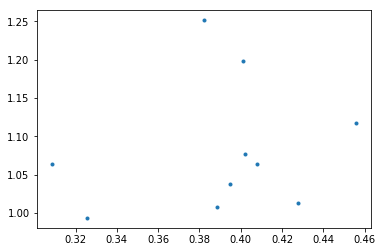

In [31]:
plt.plot(lModularity, lMax, '.')

In [32]:
for i in range(10, 43):
    resMod = analysisDiffusion(i, 250)
    resEigenMod = analysisDiffusionEigen(i, 250)
    a = (np.array(resMod[2]))/(np.array(resEigenMod[0]))
    lMax.append(max(a))
    G = nx.from_numpy_matrix(lData[i])
    partition = ldUse[i]
    partition = [partition[index] for index in ldUse[i]]
    lModularity.append(Modularity(G, partition))

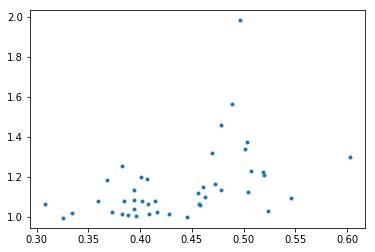

In [33]:
plt.plot(lModularity, lMax, '.')

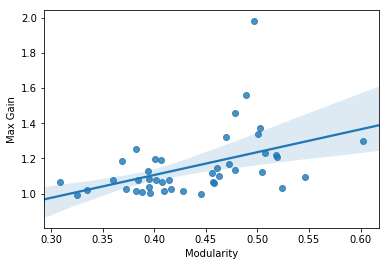

In [38]:
sns.regplot(lModularity, lMax)
plt.xlabel("Modularity")
plt.ylabel("Max Gain")
plt.savefig("RegModMax", dpi = 900)

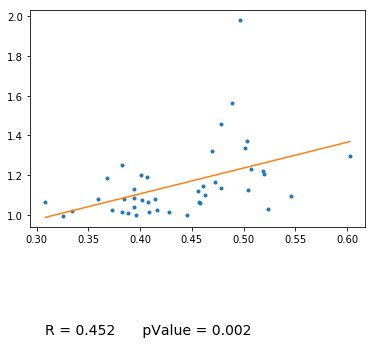

In [35]:
gradient, intercept, r_value, p_value, std_err = linregress(lModularity,lMax)

mn=min(lModularity)
mx=max(lModularity)
plt.text(mn,0.4,"R = " + "{:.3f}".format(r_value) + "      pValue = " + "{:.3f}".format(p_value), size= 14)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
#sns.regplot(listPropAdoption, listPropLeaders)
plt.plot(lModularity,lMax, '.')
plt.plot(x1,y1)
#plt.tight_layout()
#plt.savefig("RegressionPropLeaders", dpi=900)

In [74]:
def MixingMatrixChara(G,lHouse):
    n = G.number_of_nodes()
    m = G.number_of_edges()
    n_interAdopt = 0
    n_interNonAdopt = 0
    n_intraAdoptNonAdopt = 0
    lEdges = G.edges()
    for edge in lEdges:
        if lHouse[edge[0], 22] != lHouse[edge[1], 22]:
            n_intraAdoptNonAdopt += 1
        elif lHouse[edge[0], 22] == 1:
            print("HOurra")
            n_interAdopt += 2
        else :
            n_interNonAdopt += 2
    n_interAdopt, n_interNonAdopt, n_intraAdoptNonAdopt = n_interAdopt/(2*m), n_interNonAdopt/(2*m), n_intraAdoptNonAdopt/(2*m)
    interm = (n_interAdopt + n_intraAdoptNonAdopt)**(2) + (n_interNonAdopt + n_intraAdoptNonAdopt)**(2)
    print(n_interAdopt)
    print(n_interNonAdopt)
    print(n_intraAdoptNonAdopt)
    print(interm)
    if interm != 1:
        homo = (n_interAdopt + n_interNonAdopt - interm)/(1-interm)
    else :
        homo = 0
    return homo

In [75]:
list(dataCleaned)

['rooftype1',
 'rooftype2',
 'rooftype3',
 'rooftype4',
 'rooftype5',
 'hohreligion_CHRISTIANITY',
 'hohreligion_HINDUISM',
 'hohreligion_ISLAM',
 'castesubcaste_GENERAL',
 'castesubcaste_MINORITY',
 'castesubcaste_OBC',
 'castesubcaste_SCHEDULE CASTE',
 'castesubcaste_SCHEDULE TRIBE',
 'electricity_No',
 'electricity_Yes, Government',
 'electricity_Yes, Private',
 'latrine_Common',
 'latrine_None',
 'latrine_Owned',
 'ownrent_6',
 'ownrent_GIVEN BY GOVERNMENT',
 'ownrent_OWNED',
 'ownrent_OWNED BUT SHARED',
 'ownrent_RENTED']

In [76]:
matHouseCleaned = dataCleaned.values
lHouseVillDfCleaned = []
c = 0
for i in range(43):
    a = lData[i].shape[0]
    lHouseVillDfCleaned.append(matHouseCleaned[c:c + a])
    c += a

In [77]:
MixingMatrixChara(nx.from_numpy_matrix(lData[29]),lHouseVillDfCleaned[29])

0.0
0.9977578475336323
0.0011210762331838565
0.9977603611574735


-0.0011223344556513764

In [80]:
for i in range(lHouseVill[29].shape[0]):
    print(lHouseVill[29][i,2])

HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
HINDUISM
H

In [81]:
list(lHouseVillDf[29])

['rooftype1',
 'rooftype2',
 'rooftype3',
 'rooftype4',
 'rooftype5',
 'hohreligion_CHRISTIANITY',
 'hohreligion_HINDUISM',
 'hohreligion_ISLAM',
 'castesubcaste_GENERAL',
 'castesubcaste_MINORITY',
 'castesubcaste_OBC',
 'castesubcaste_SCHEDULE CASTE',
 'castesubcaste_SCHEDULE TRIBE',
 'electricity_No',
 'electricity_Yes, Government',
 'electricity_Yes, Private',
 'latrine_Common',
 'latrine_None',
 'latrine_Owned',
 'ownrent_6',
 'ownrent_GIVEN BY GOVERNMENT',
 'ownrent_OWNED',
 'ownrent_OWNED BUT SHARED',
 'ownrent_RENTED']